In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df = df.drop(['ID'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [6]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
data = df.copy()

data['Sex'] = data['Sex'].replace(0, 'male')
data['Sex'] = data['Sex'].replace(1, 'female')
data['Marital status'] = data['Marital status'].replace(0, 'single')
data['Marital status'] = data['Marital status'].replace(1, 'non-single')
data['Education'] = data['Education'].replace(0, 'other / unknown')
data['Education'] = data['Education'].replace(1, 'high school')
data['Education'] = data['Education'].replace(2, 'university')
data['Education'] = data['Education'].replace(3, 'graduate school')
data['Occupation'] = data['Occupation'].replace(0, 'unemployed / unskilled')
data['Occupation'] = data['Occupation'].replace(1, 'skilled employee / official')
data['Occupation'] = data['Occupation'].replace(2, 'management / self-employed / highly qualified employee / officer')
data['Settlement size'] = data['Settlement size'].replace(0, 'small city')
data['Settlement size'] = data['Settlement size'].replace(1, 'mid-sized city')
data['Settlement size'] = data['Settlement size'].replace(2, 'big city')

data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,male,single,67,university,124670,skilled employee / official,big city
1,female,non-single,22,high school,150773,skilled employee / official,big city
2,male,single,49,high school,89210,unemployed / unskilled,small city
3,male,single,45,high school,171565,skilled employee / official,mid-sized city
4,male,single,53,high school,149031,skilled employee / official,mid-sized city


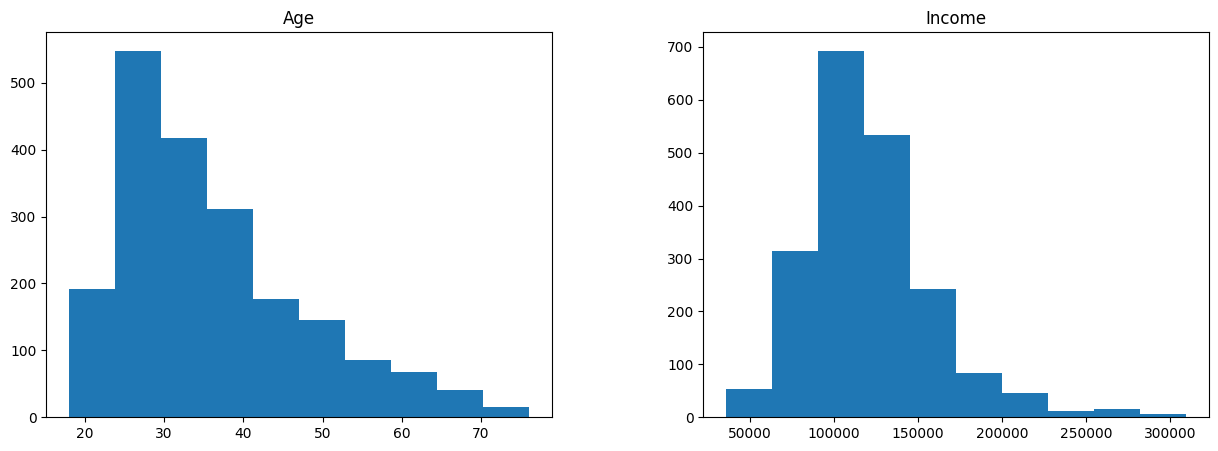

In [8]:
data.hist(figsize=(15, 5), grid=False)
plt.show()

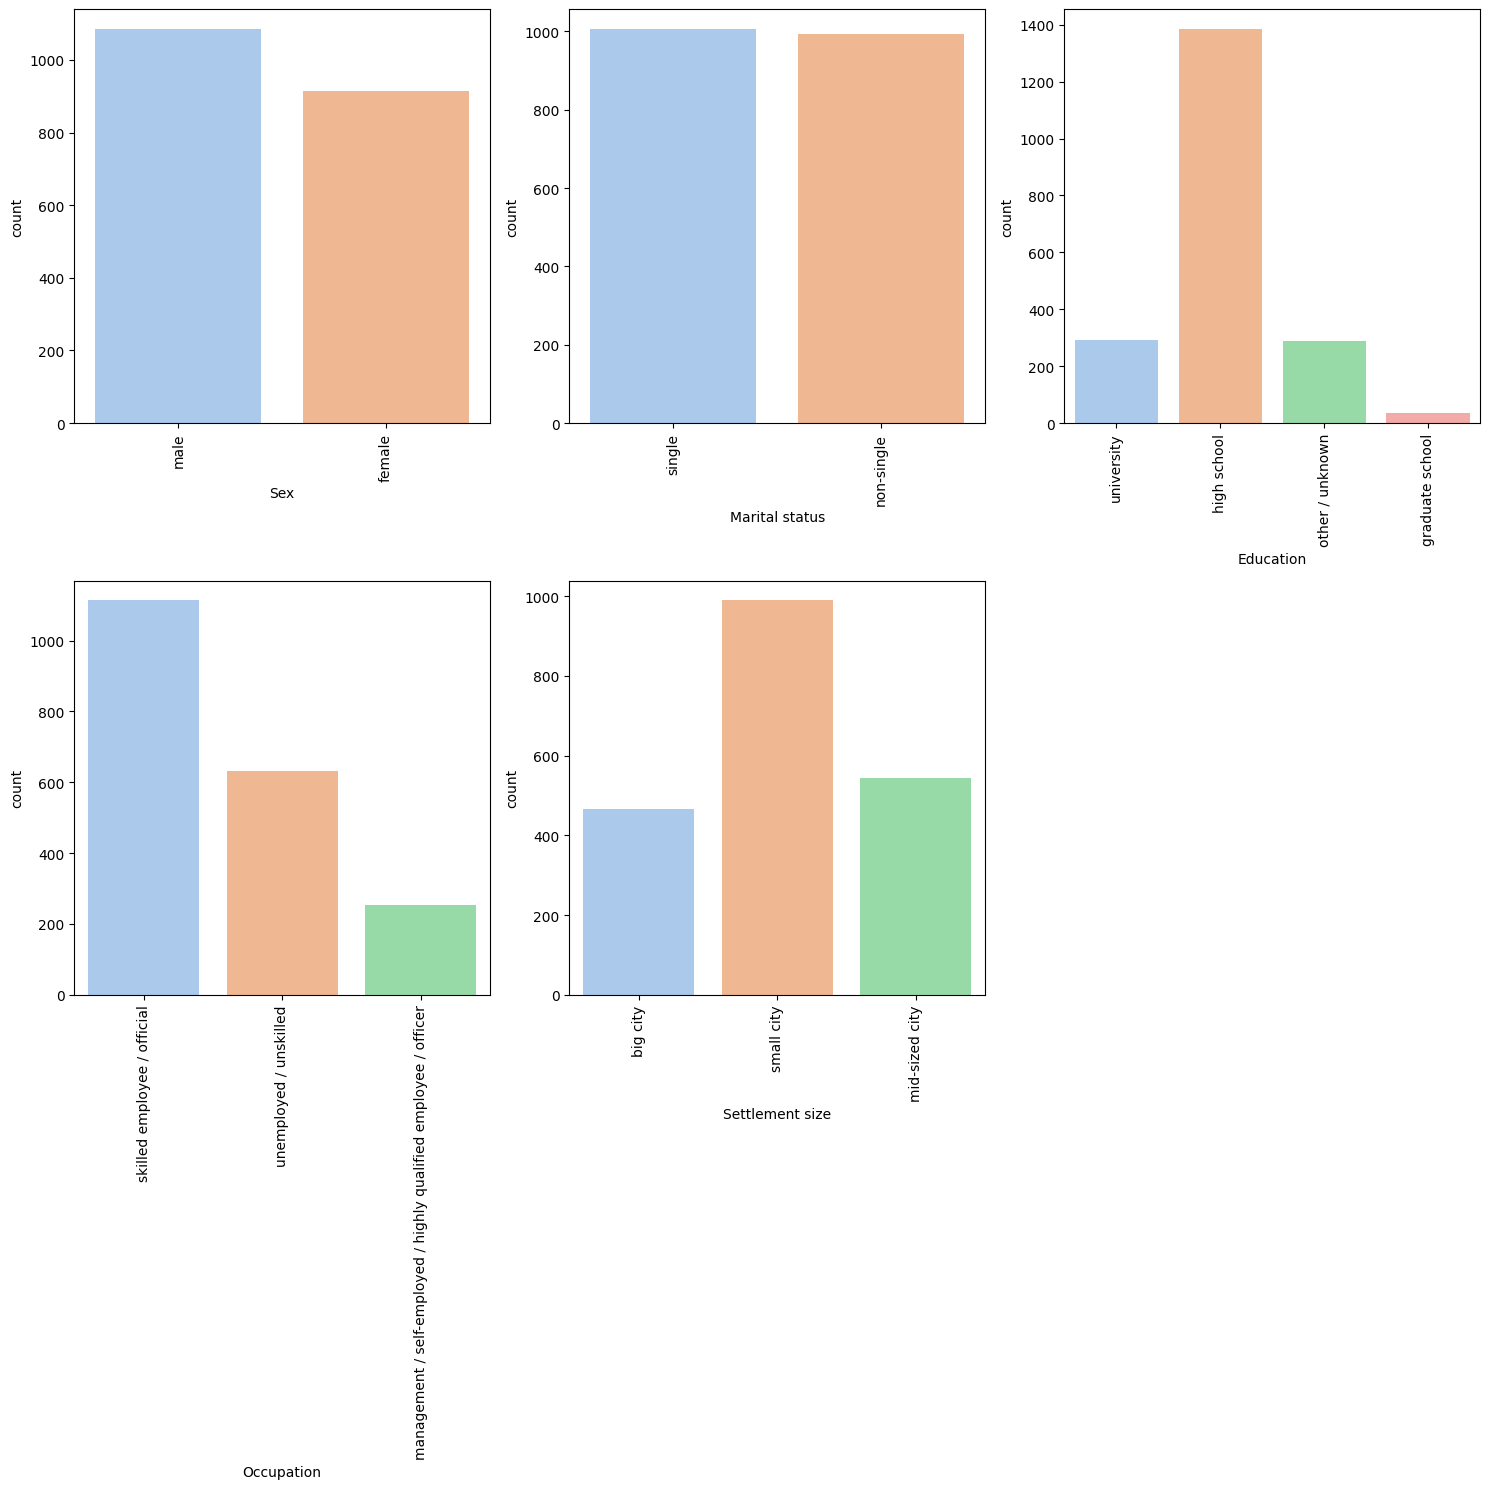

In [9]:
categories = data[['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 15))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


# K-means

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
X = df_scaled

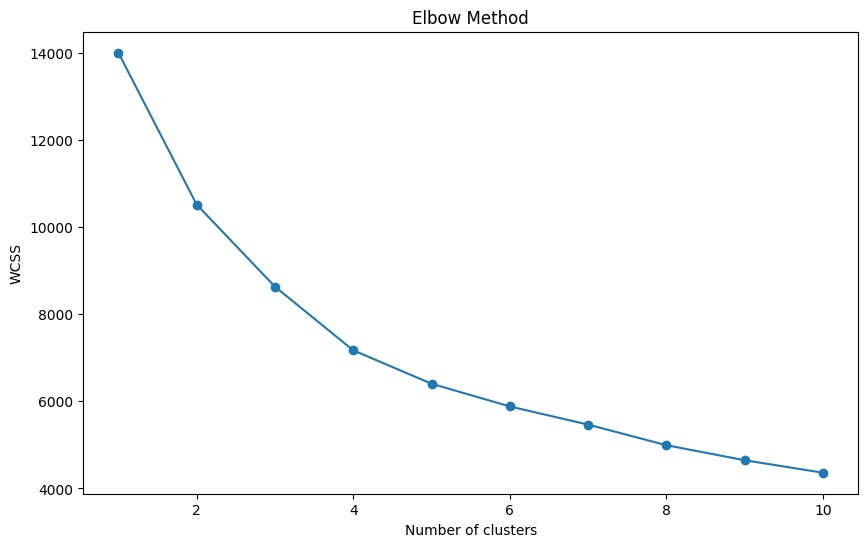

In [13]:
wcss = []   # сумма квадратов расстояний внутри кластера

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')   # Метод Локтя
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Будем проводить расчет по 4 кластерам

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_labels'] = kmeans_labels

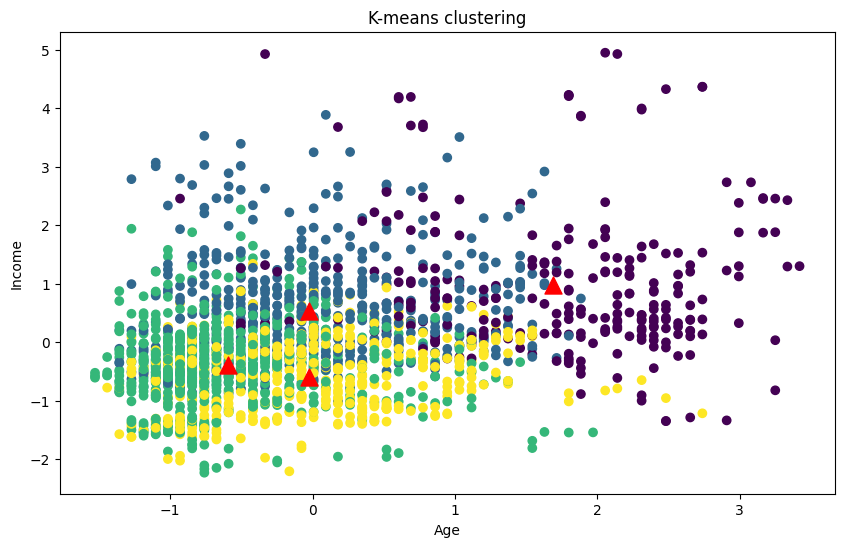

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,2], X.iloc[:,4], c=kmeans_labels)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,4], marker='^', s=150, c='red')
plt.title('K-means clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Cluster 0

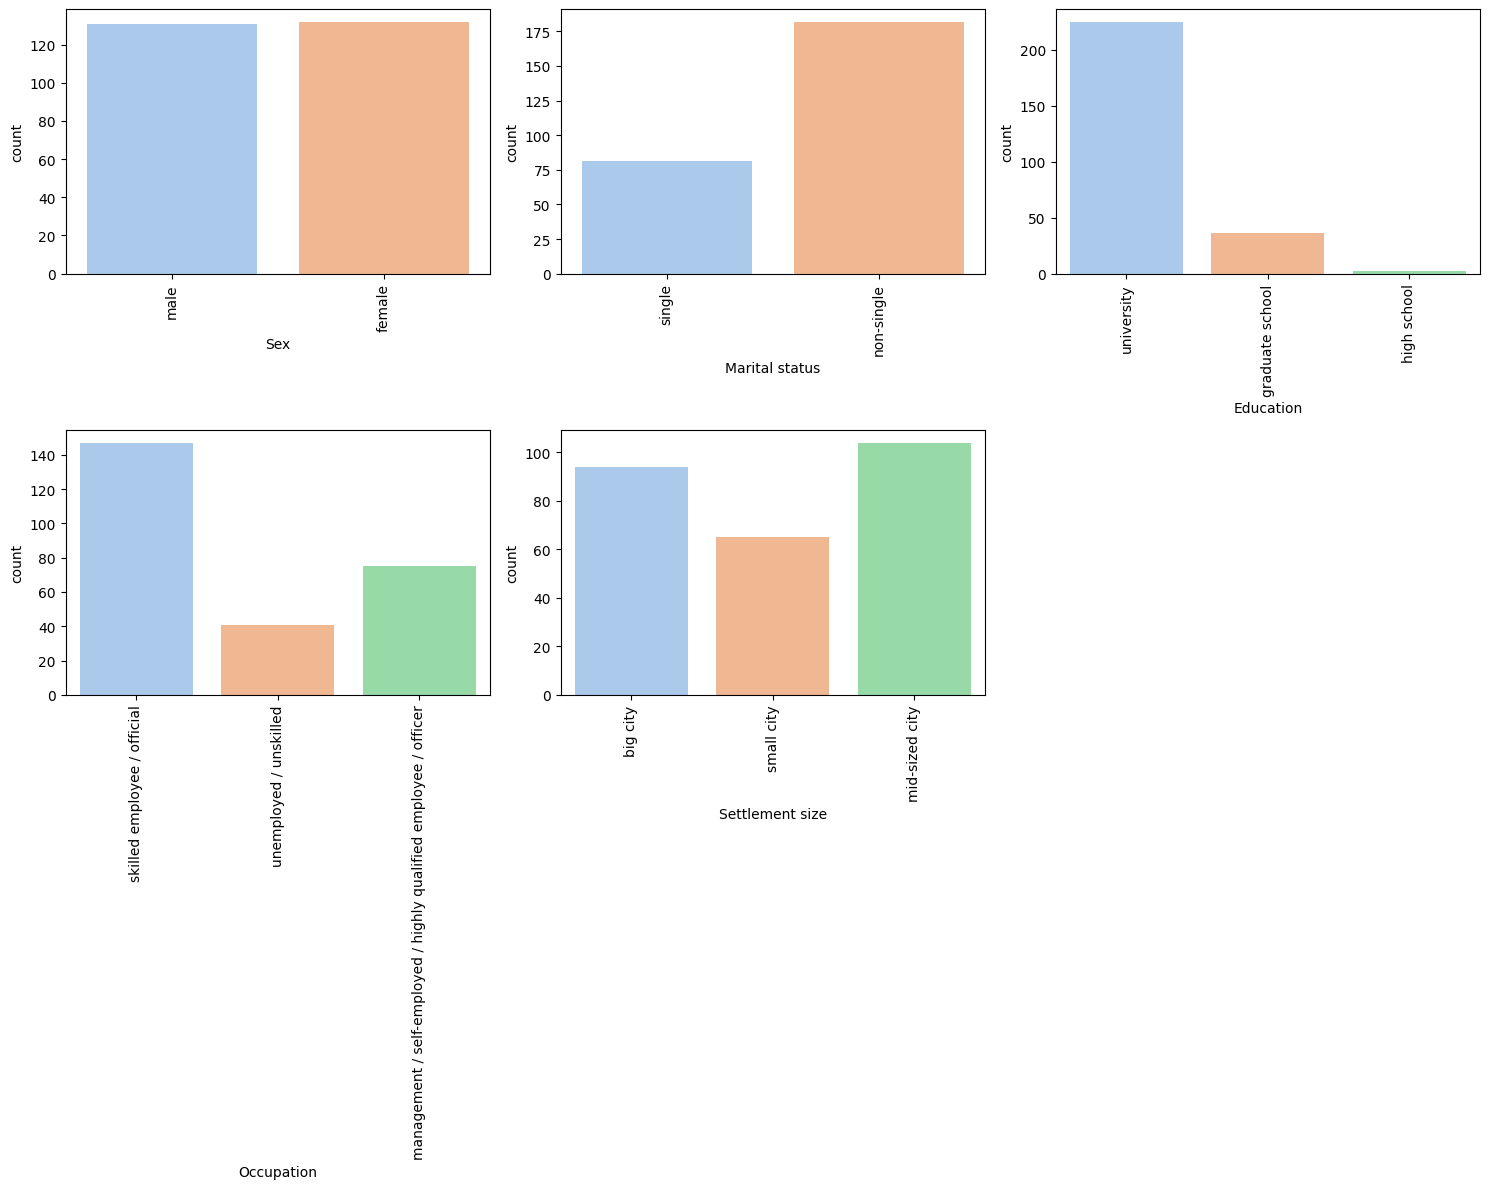

In [16]:
categories = data[data['kmeans_labels'] == 0][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel')
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

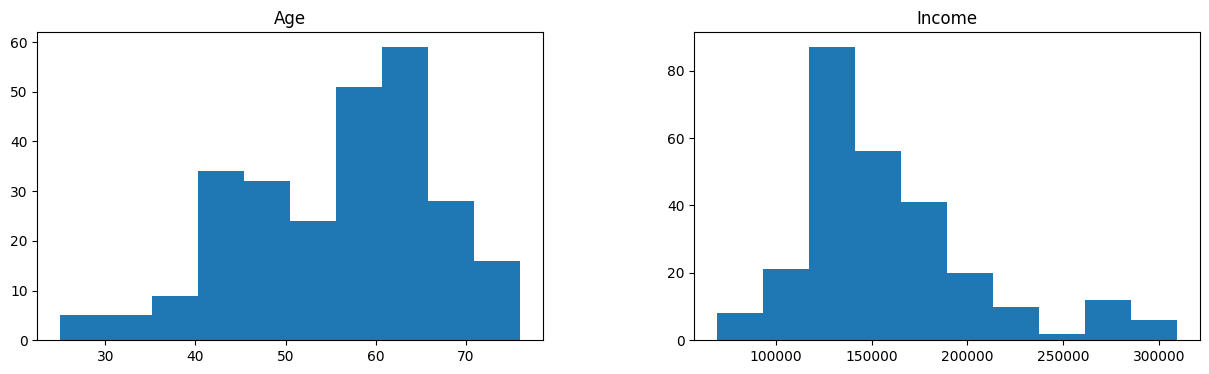

In [17]:
data[data['kmeans_labels'] == 0][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 0:
* Мужчины и женщины
* В основном не одинокие
* Закончили университет
* Квалифицированные сотрудники, безработные (малая часть)
* В основном из средних и больших городов
* 40-65 лет
* Средний, выше среднего доход

Cluster 1

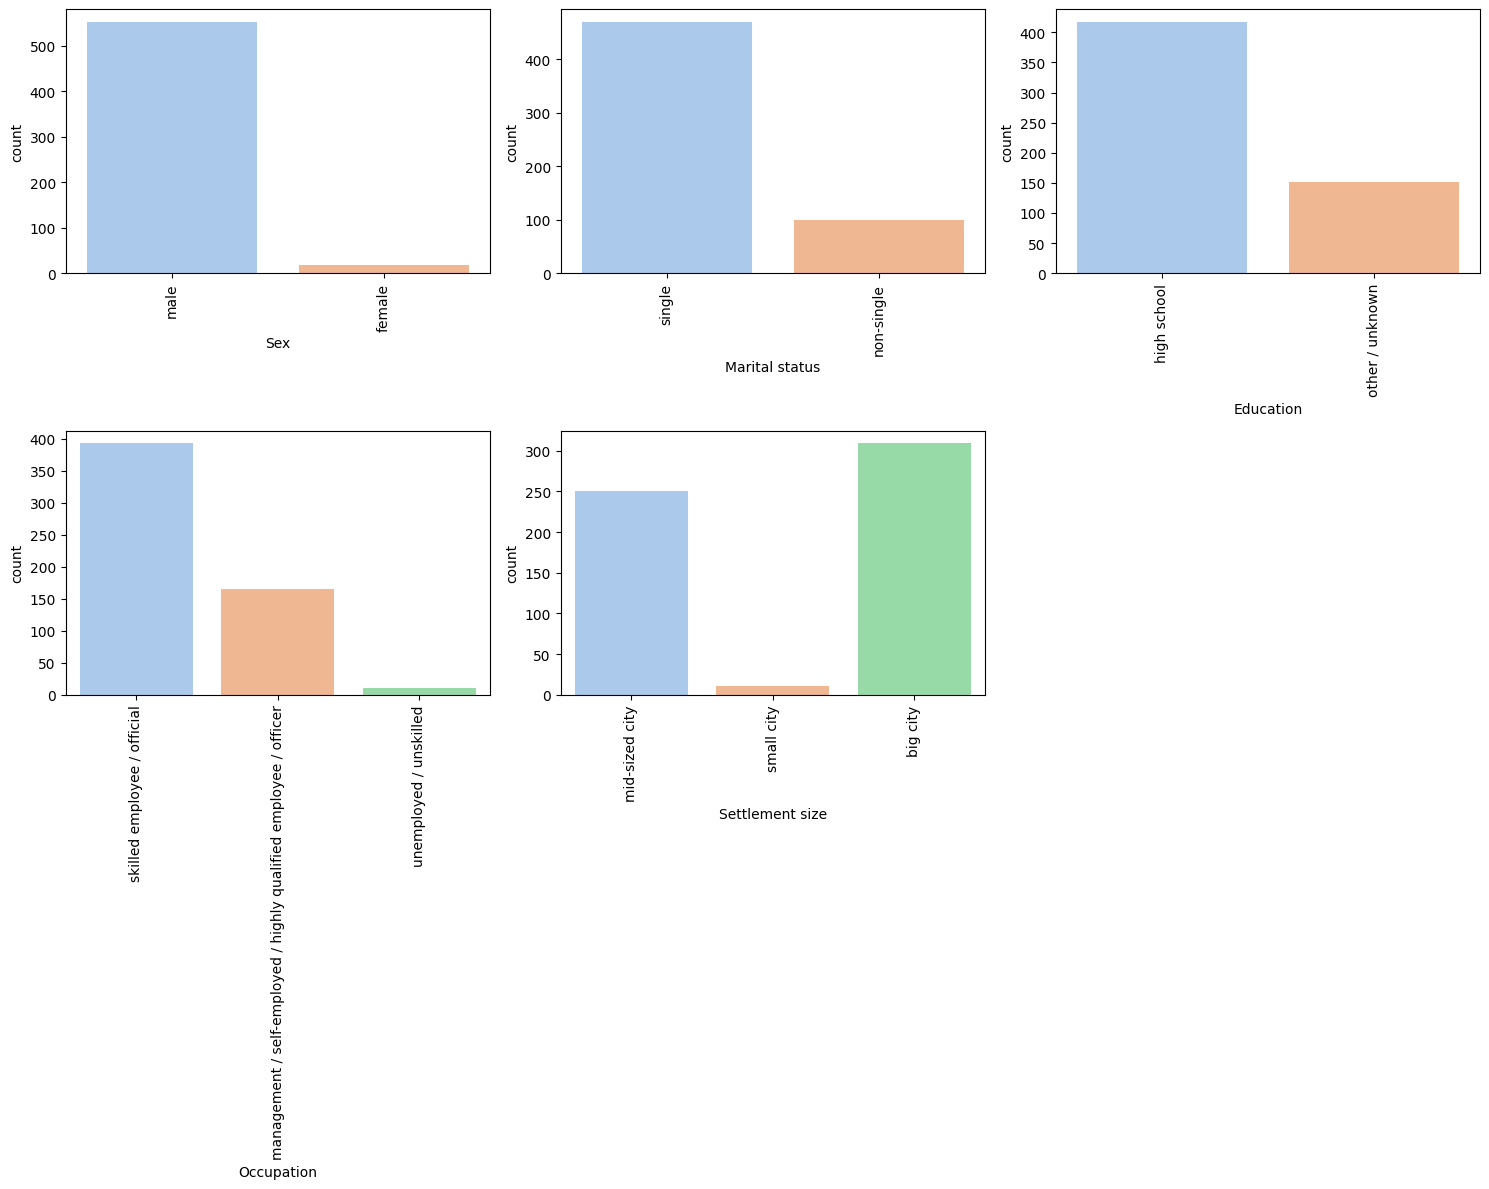

In [18]:
categories = data[data['kmeans_labels'] == 1][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

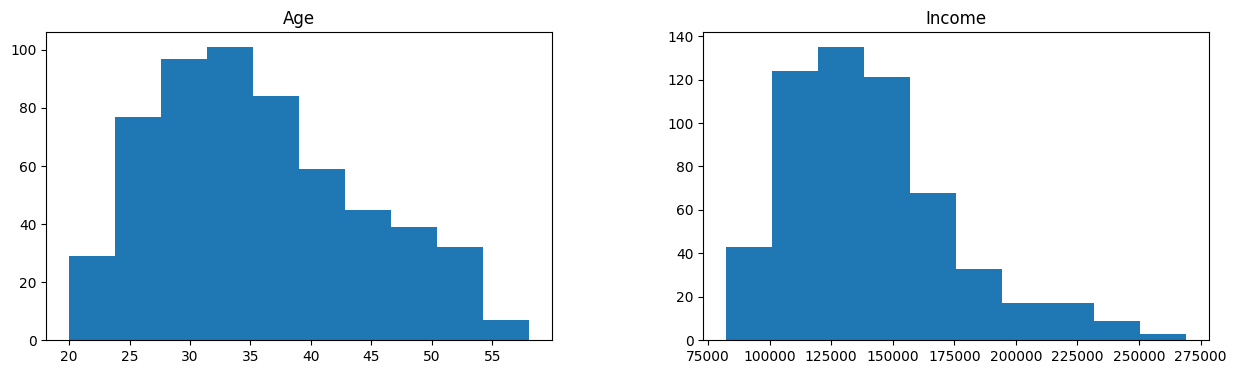

In [19]:
data[data['kmeans_labels'] == 1][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 1:
* В основном мужчины
* По большей части одинокие
* Закончили старшую школу или пр.
* Квалифицированные сотрудники, должностные лица
* Из больших и средних городов  
* 25-45 лет
* Средний, чуть ниже среднего доход

Cluster 2

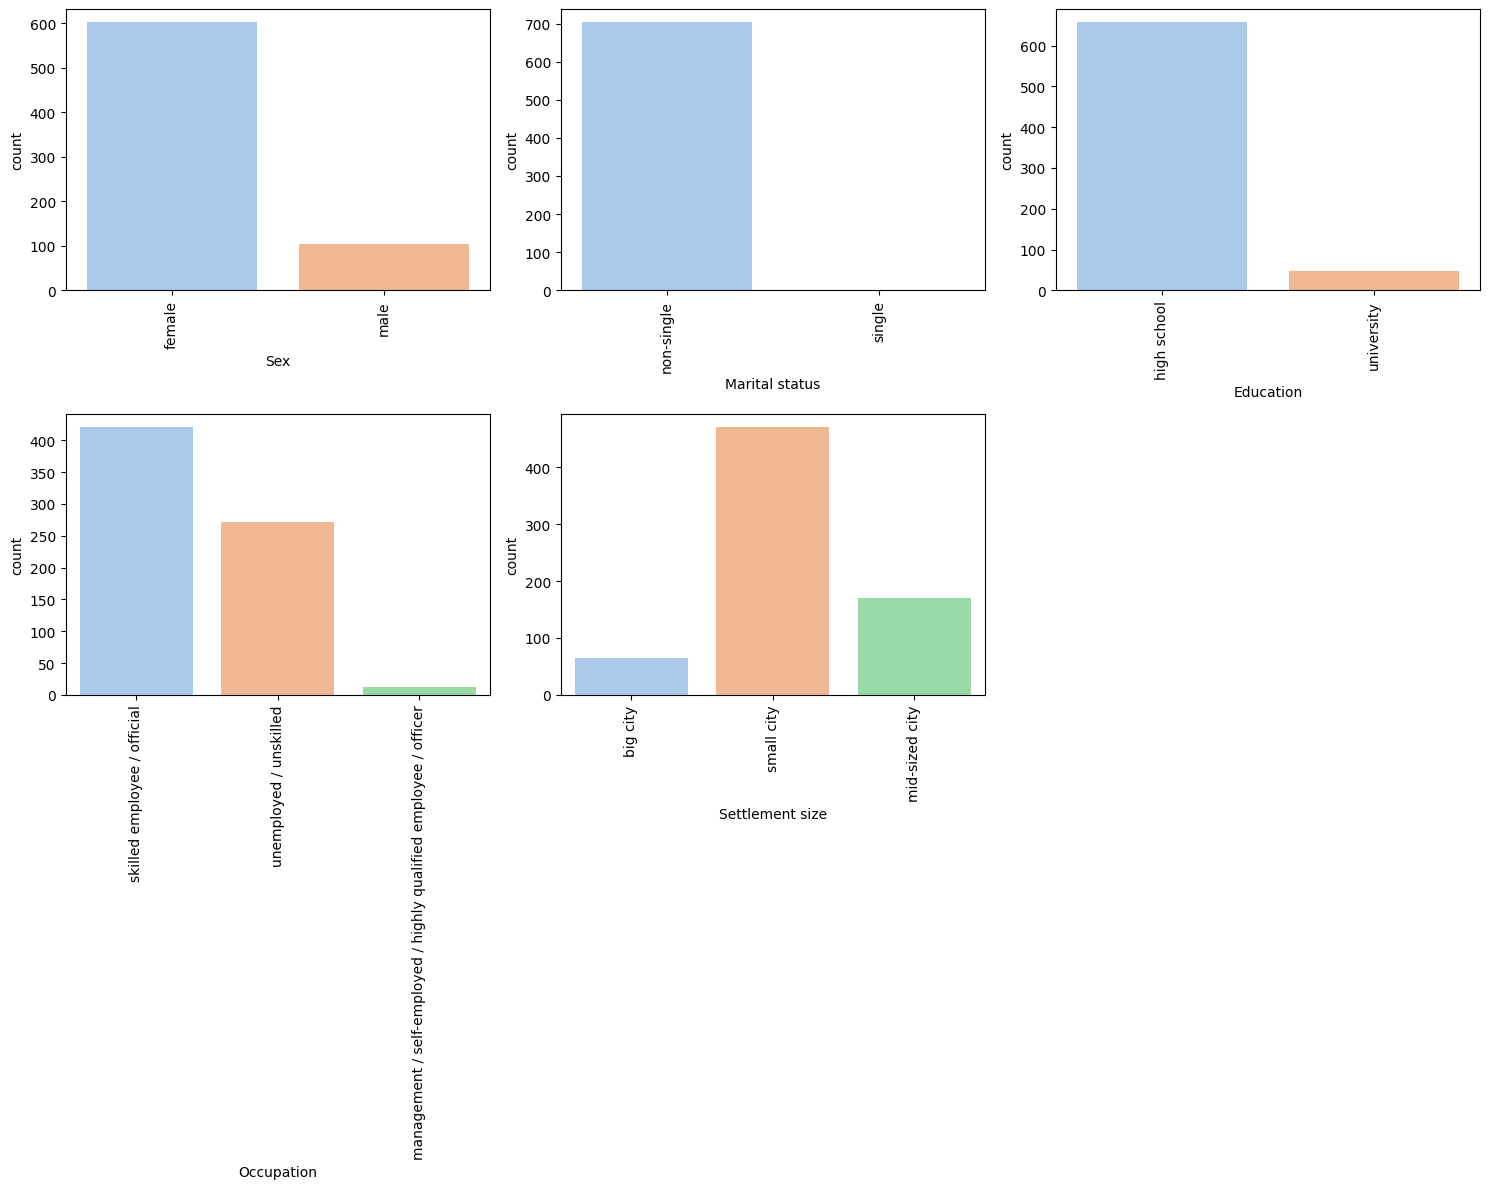

In [20]:
categories = data[data['kmeans_labels'] == 2][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

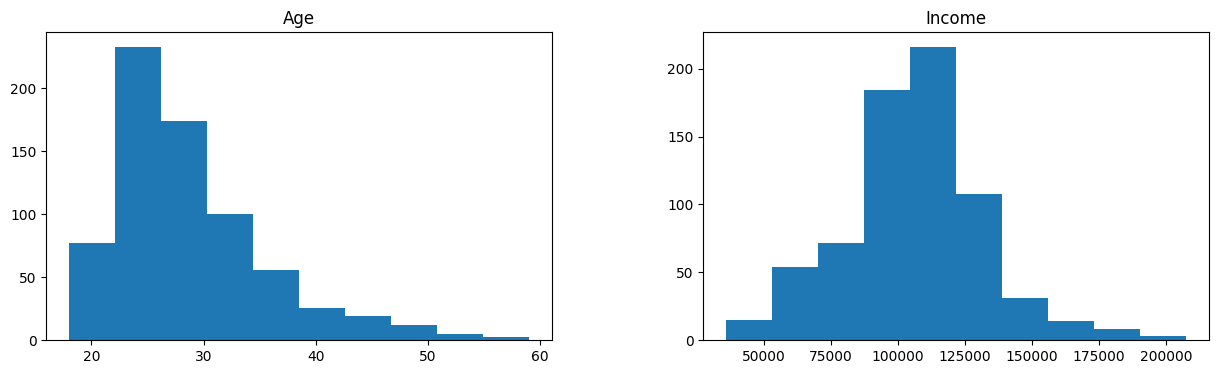

In [21]:
data[data['kmeans_labels'] == 2][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 2:
* В основном женщины
* Не одинокие
* Закончили старшую школу, немногие университет
* Квалифицированные сотрудники и безработные
* Из маленьких городов, меньшая часть из средних и больших городов
* 20-40 лет
* Ниже среднего доход

Cluster 3

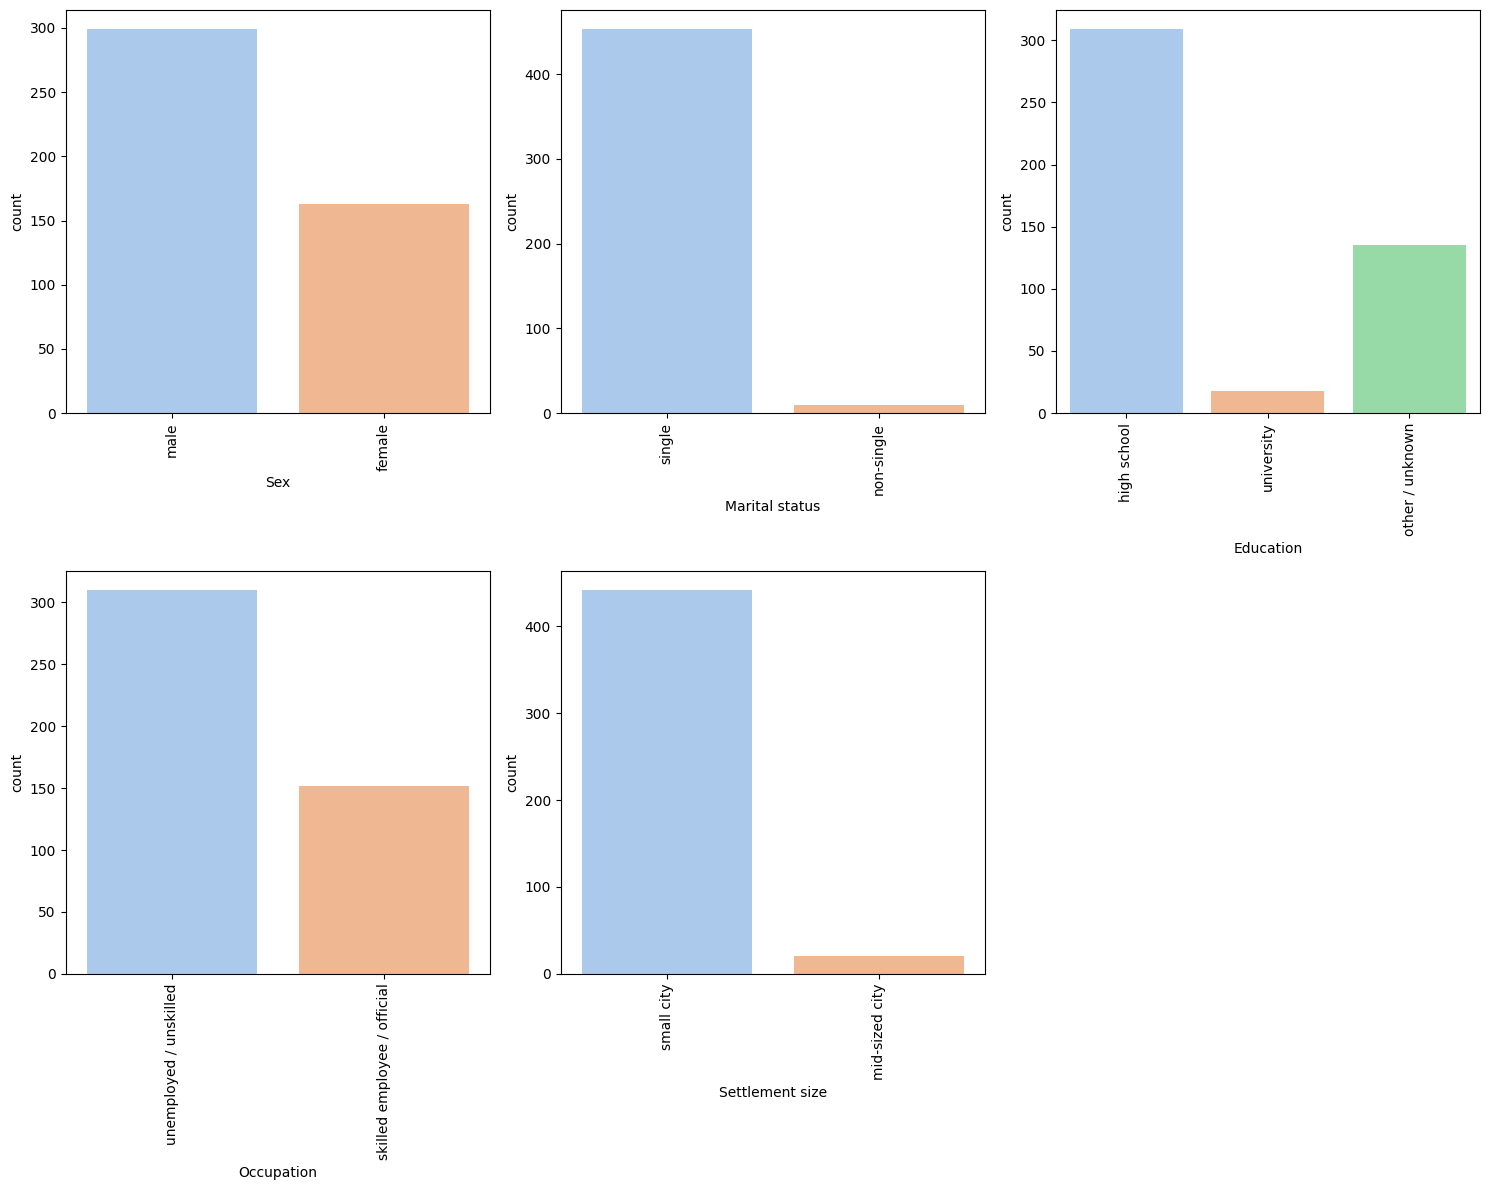

In [22]:
categories = data[data['kmeans_labels'] == 3][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

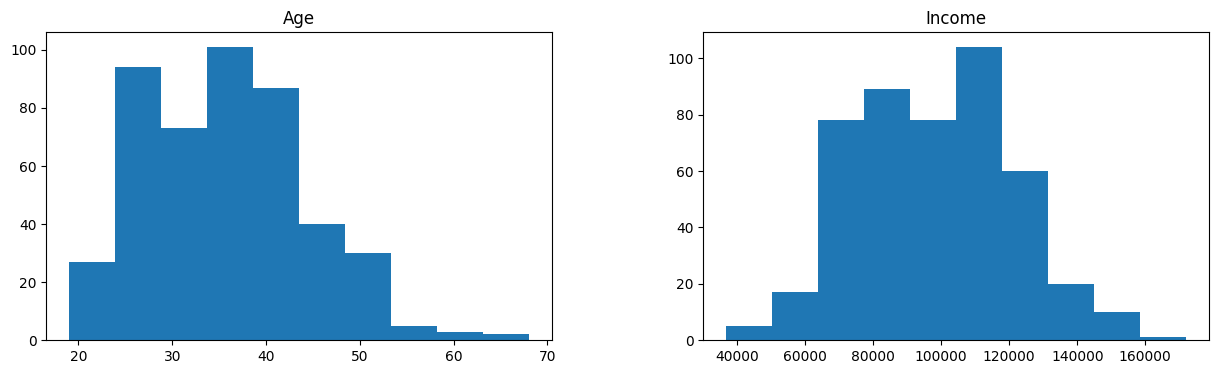

In [23]:
data[data['kmeans_labels'] == 3][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 3:
* По большей части мужчины, по меньшей женщины
* Одинокие
* Закончили школу и пр.
* Безработные, меньшая часть трудоустроена
* Из маленьких городов
* 25-50 лет
* Доход ниже среднего

# Иерархическая кластеризация

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
aggl = AgglomerativeClustering(n_clusters=4)
aggl_labels = aggl.fit_predict(X)
data['aggl_labels'] = aggl_labels

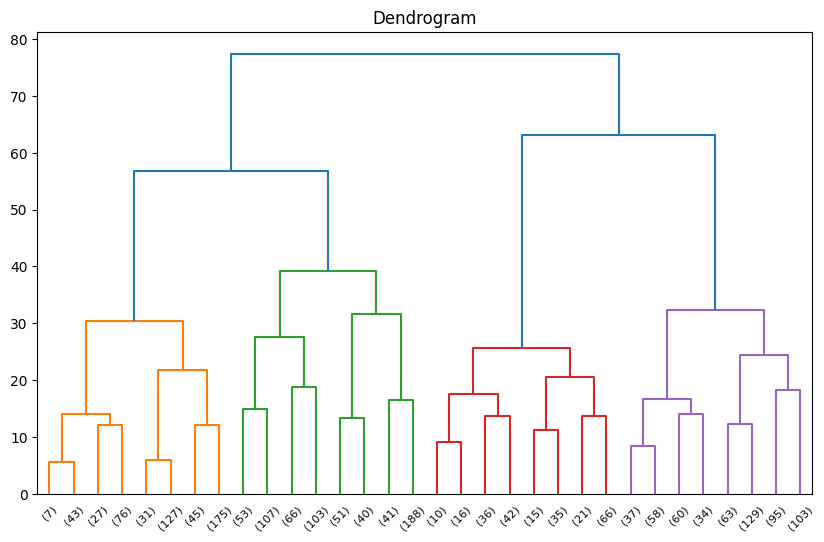

In [26]:
plt.figure(figsize=(10,6))
dendrogram(linkage(X, method='ward'), truncate_mode='level', p=4)
plt.title('Dendrogram')
plt.show()

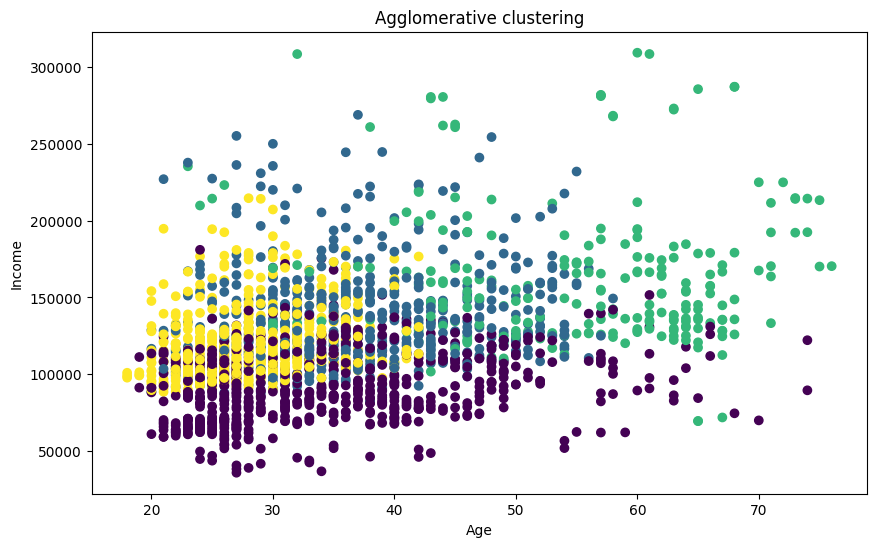

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(data.iloc[:, 2], data.iloc[:, 4], c=aggl_labels)
plt.title('Agglomerative clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Cluster 0

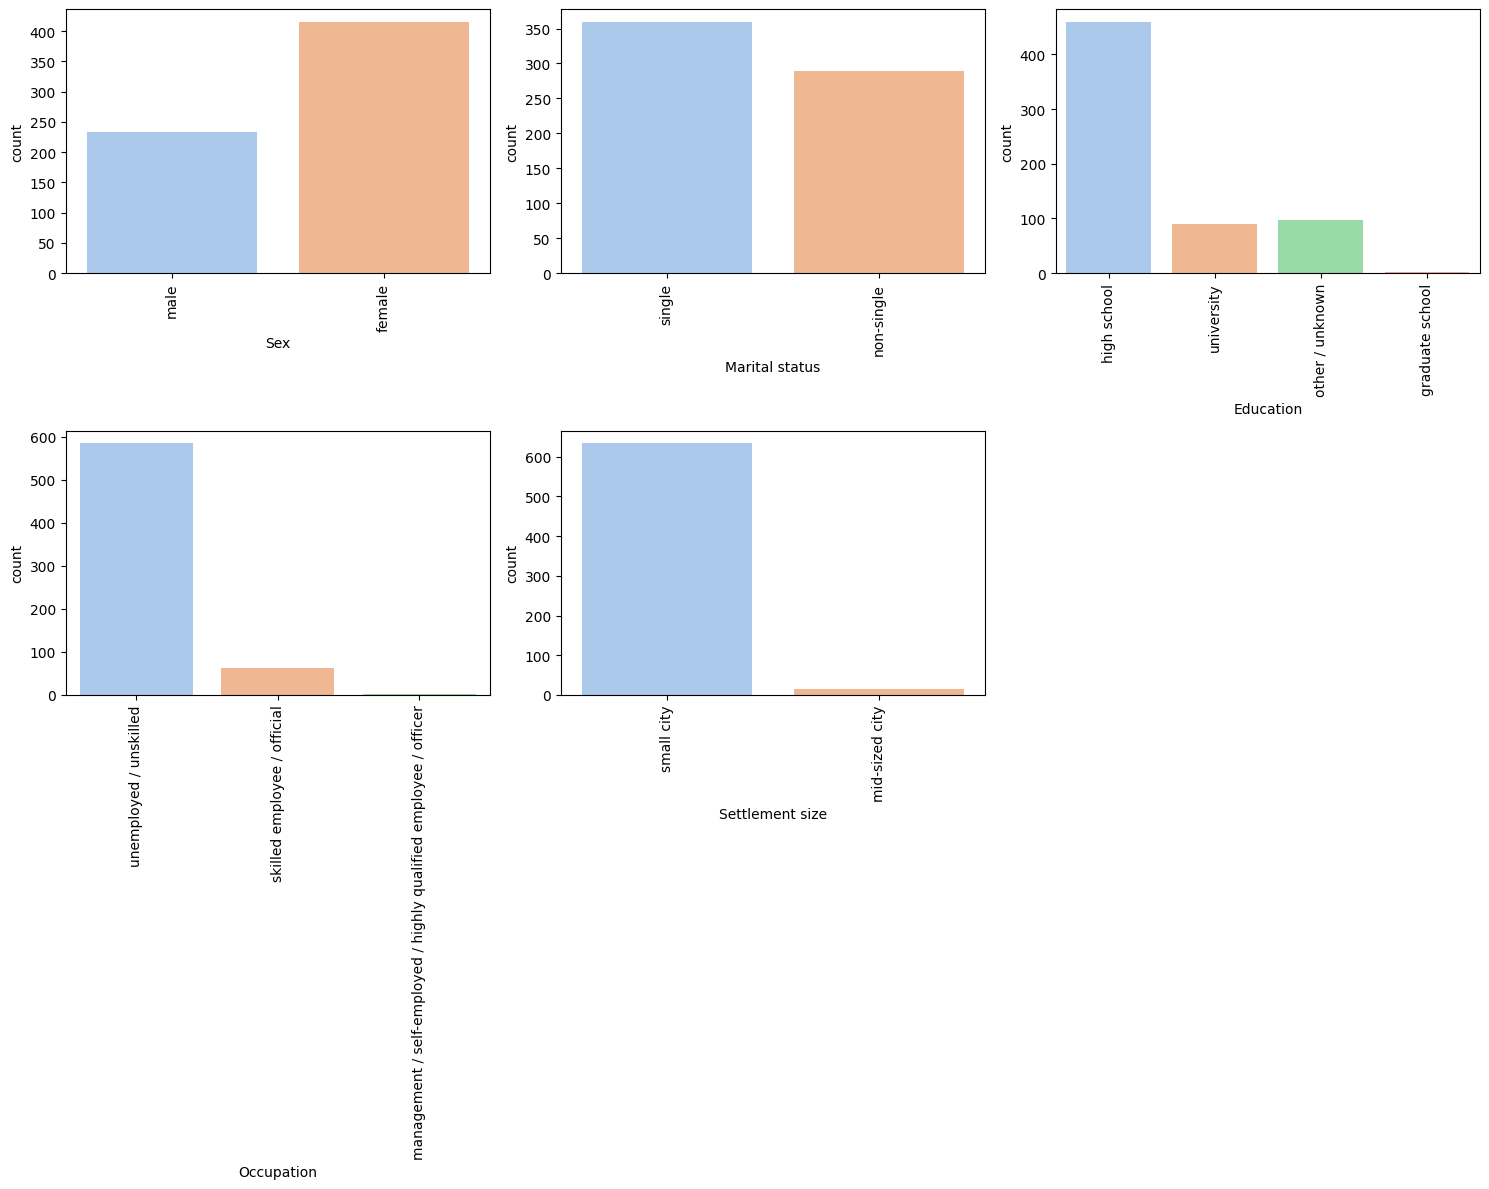

In [28]:
categories = data[data['aggl_labels'] == 0][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

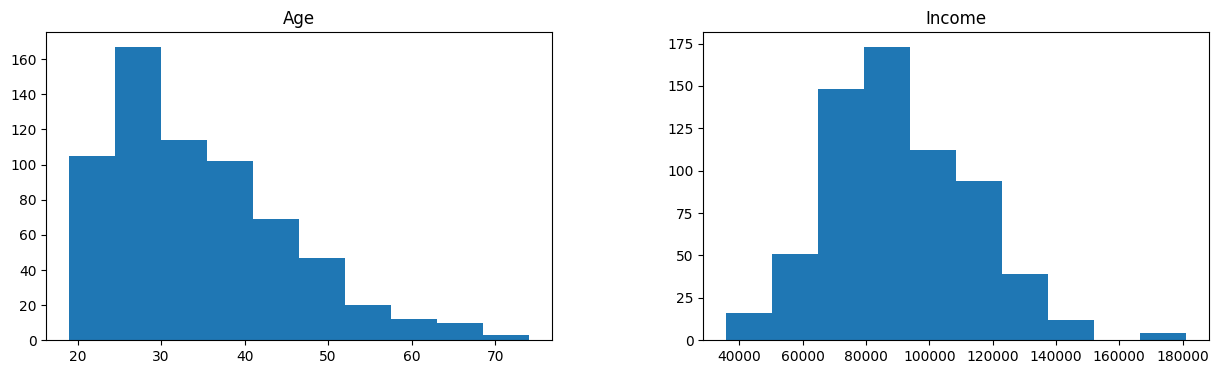

In [29]:
data[data['aggl_labels'] == 0][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 0:
* По большей части женщины
* Большинство одиноких, но есть и с семьями
* Закончили старшую школу, немногие университет
* В основном безработные
* Из маленьких городов
* 20-50 лет
* Доход ниже среднего

Cluster 1

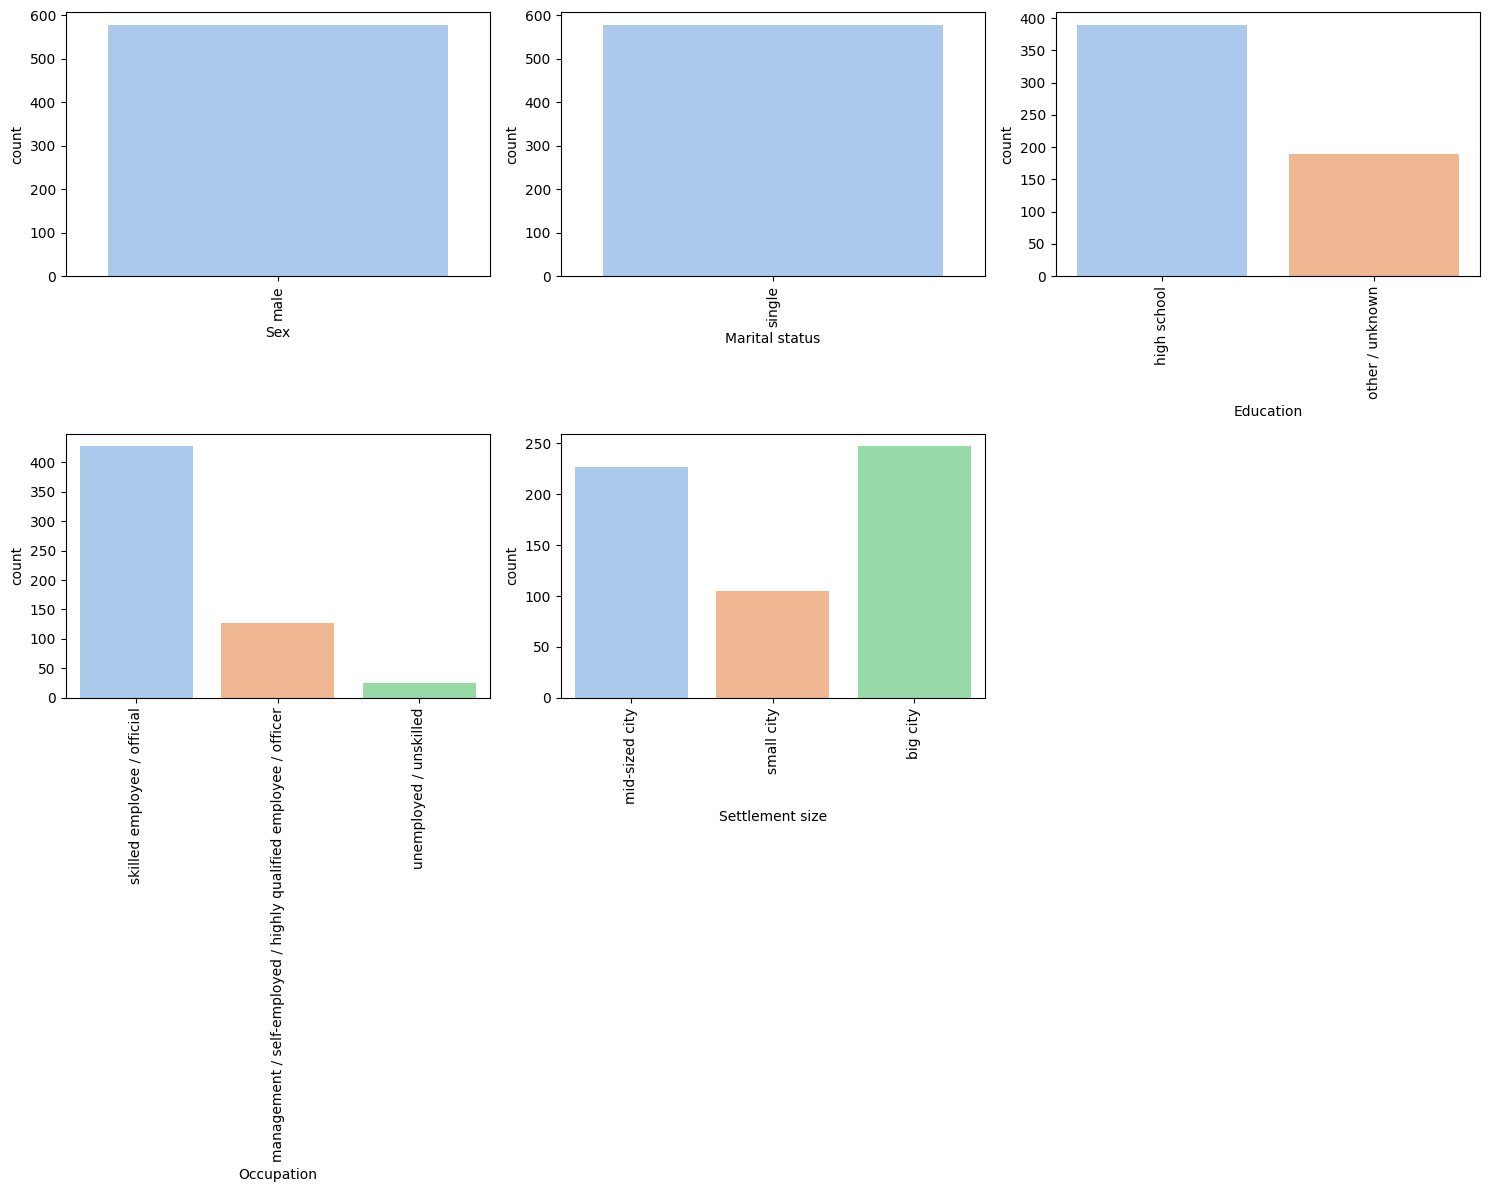

In [30]:
categories = data[data['aggl_labels'] == 1][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

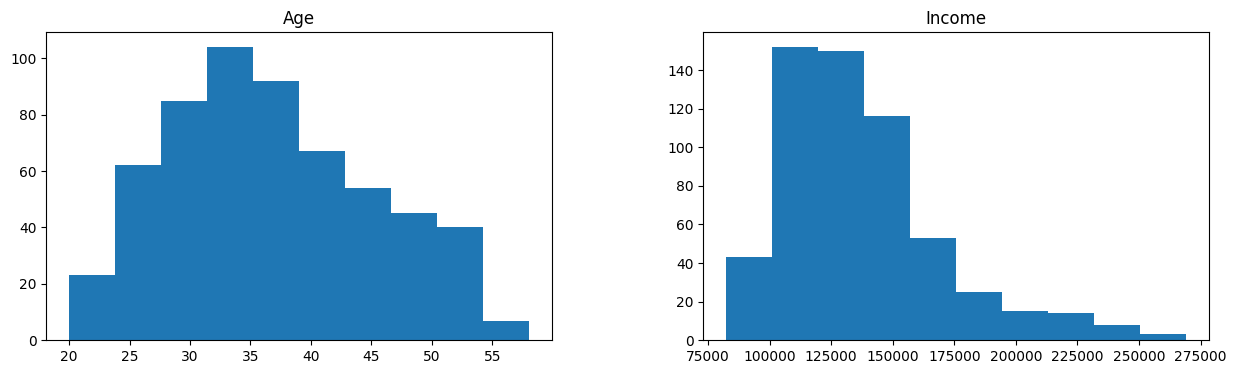

In [31]:
data[data['aggl_labels'] == 1][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 1:
* Мужчины
* Одинокие
* Закончили старшую школу или пр.
* Квалифицированные сотрудники, должностные лица
* В основном из больших и средних городов
* 25-55 лет
* Средний, чуть ниже среднего доход

Cluster 2

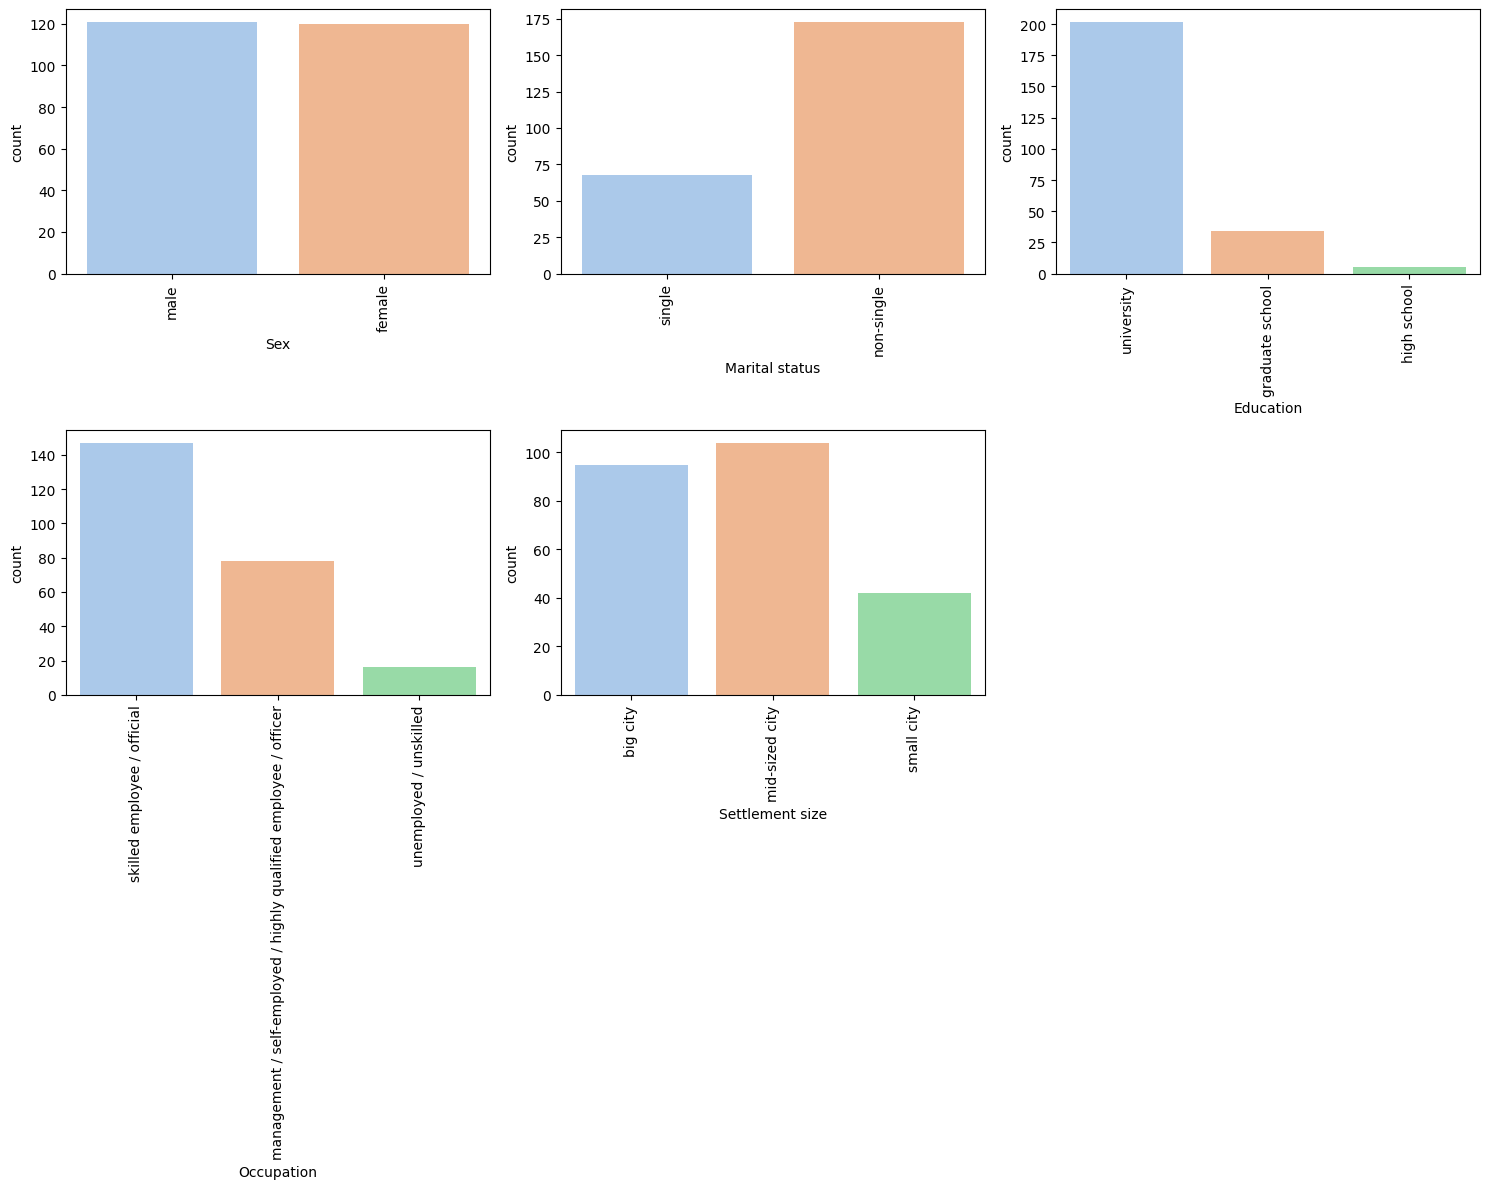

In [32]:
categories = data[data['aggl_labels'] == 2][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

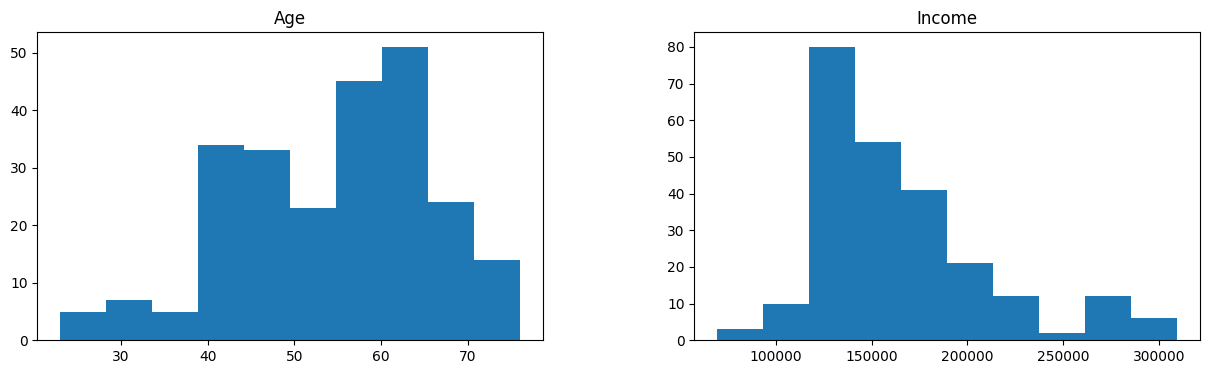

In [33]:
data[data['aggl_labels'] == 2][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 2:
* Мужчины и женщины
* С семьями и без (малая часть)
* Закончили университет, немногие аспирантуру
* Квалифицированные сотрудники, должностные лица
* Из средних и больших городов
* 40+ лет
* Средний, выше среднего доход

Cluster 3

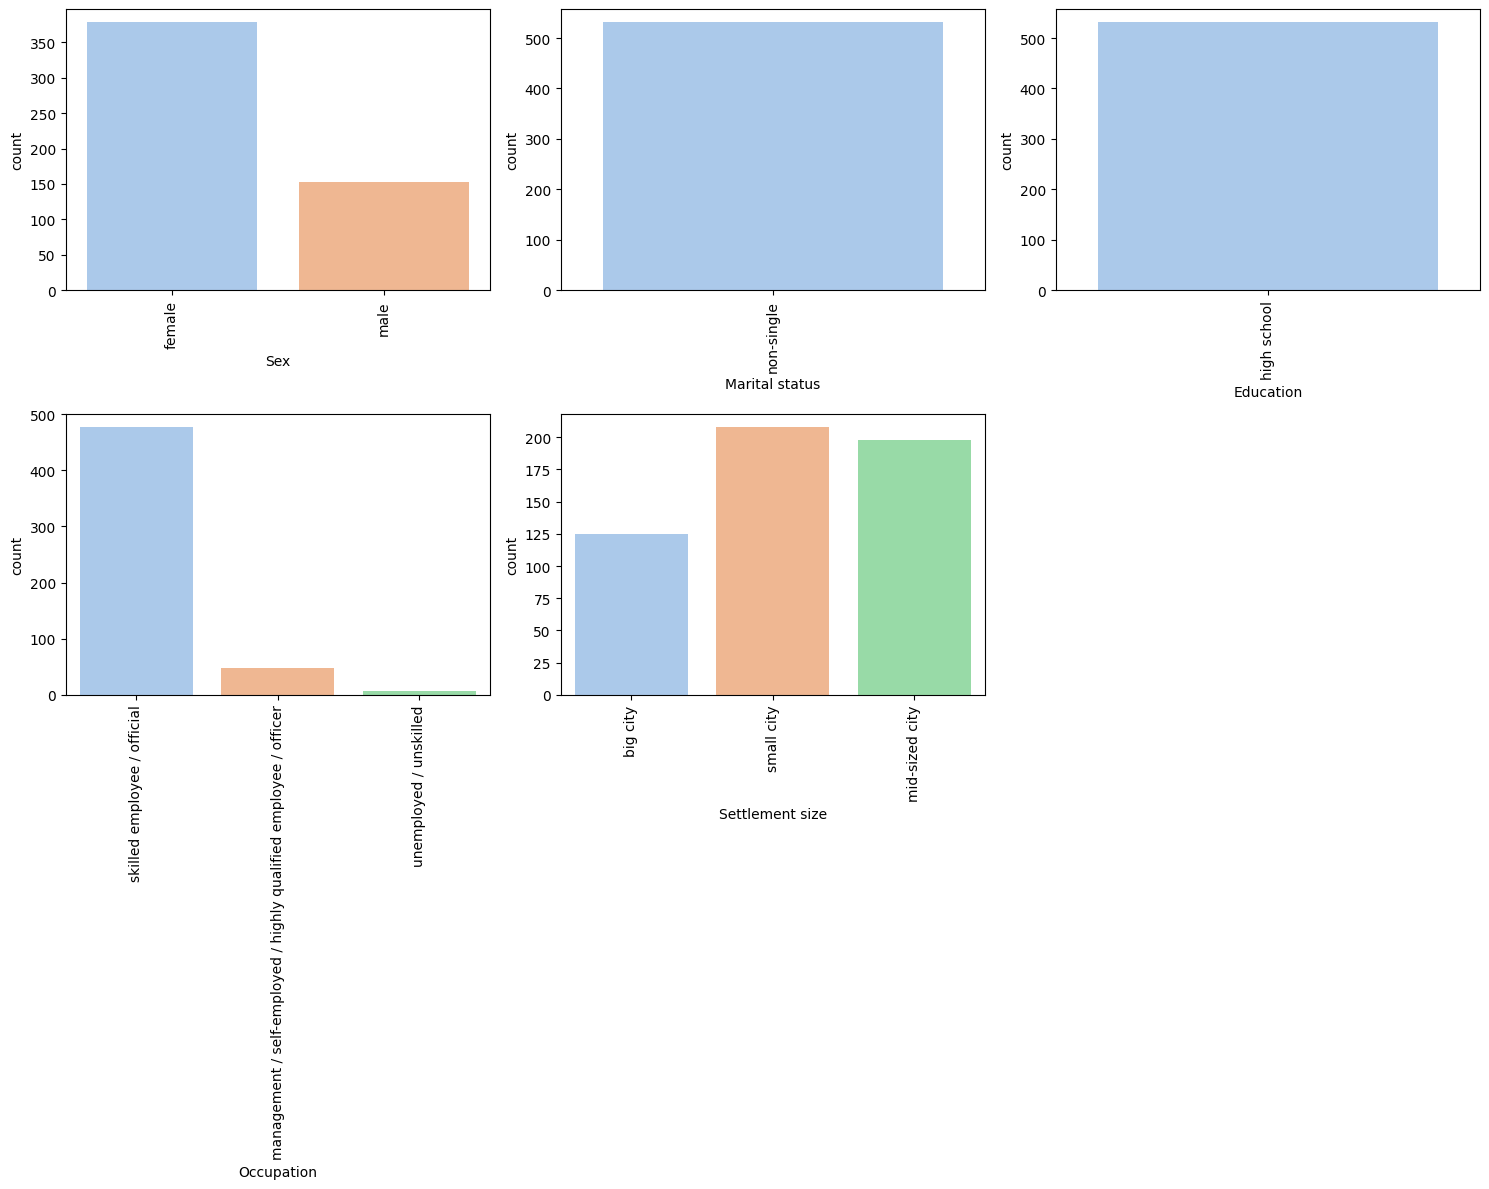

In [34]:
categories = data[data['aggl_labels'] == 3][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

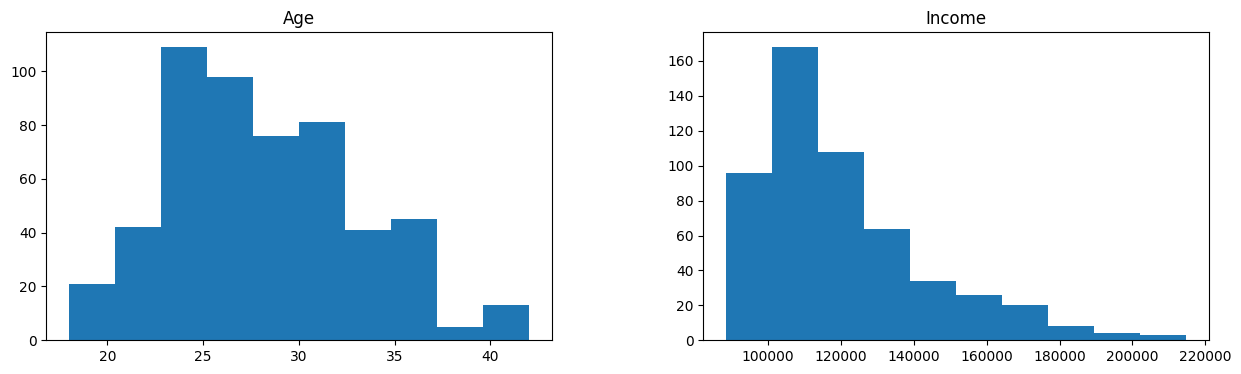

In [35]:
data[data['aggl_labels'] == 3][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 3:
* По большей части женщины, по меньшей мужчины
* Не одинокие
* Закончили школу
* Квалифицированные сотрудники
* Из маленьких и средних городов, из больших (малая часть)
* 25-35 лет
* Доход чуть ниже среднего

# DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
dbscan = DBSCAN(eps=1.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
data['dbscan_labels'] = dbscan_labels

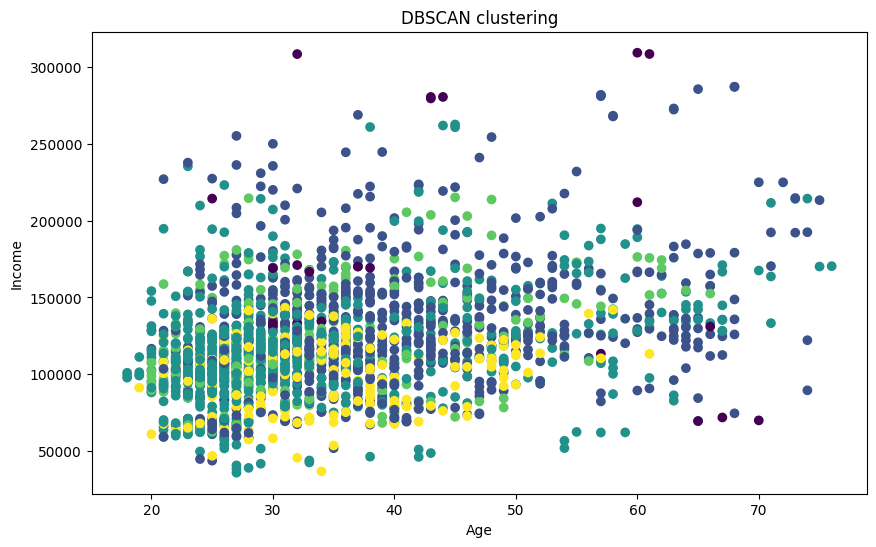

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(data.iloc[:, 2], data.iloc[:, 4], c=dbscan_labels)
plt.title('DBSCAN clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Cluster 0

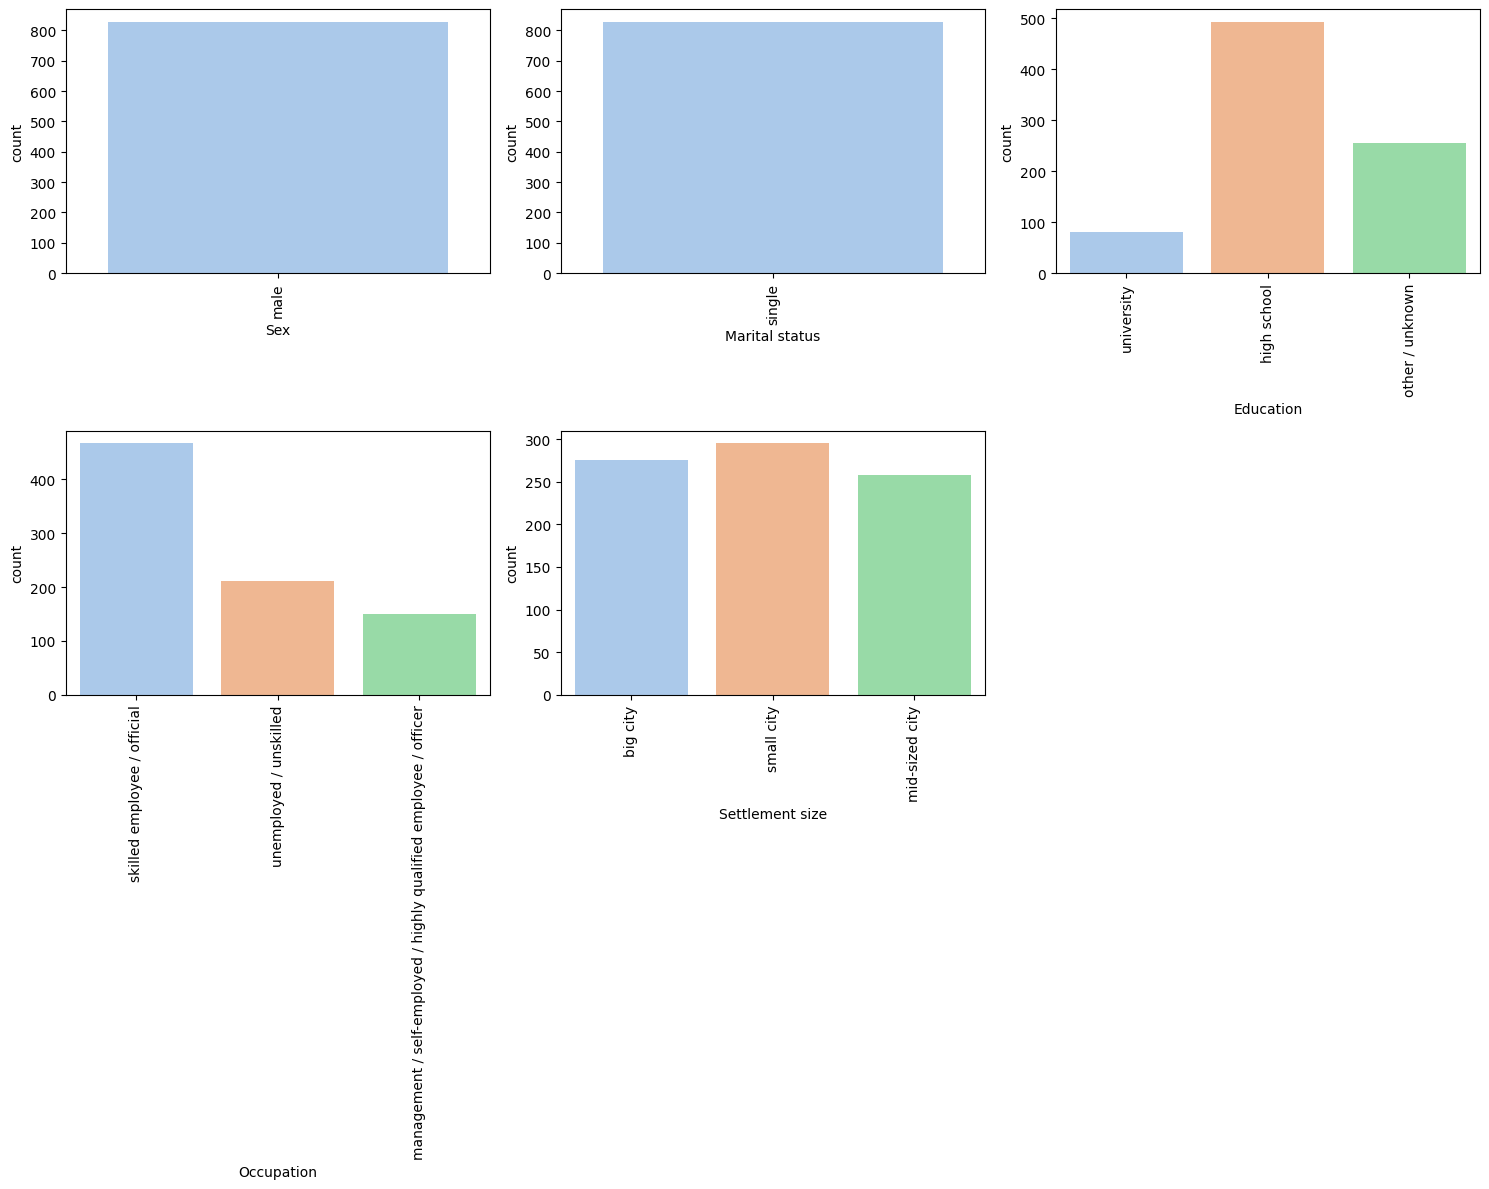

In [39]:
categories = data[data['dbscan_labels'] == 0][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

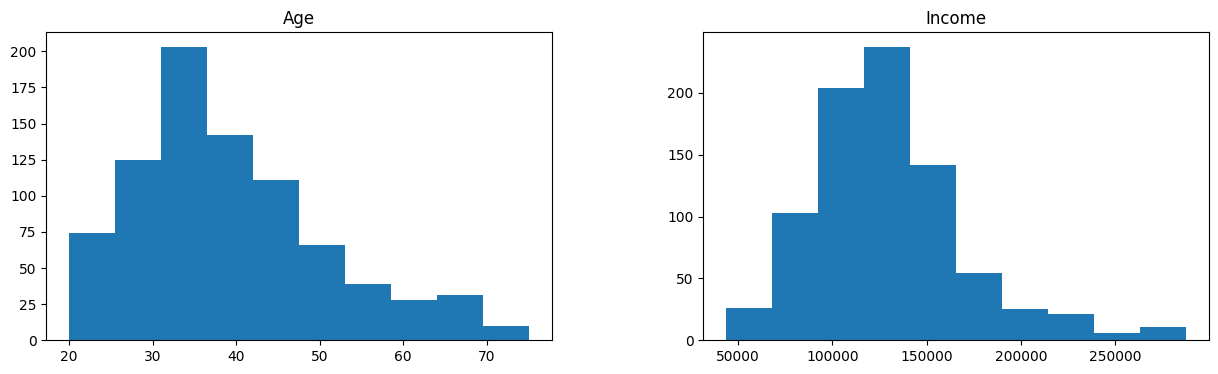

In [40]:
data[data['dbscan_labels'] == 0][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 0:
* Мужчины
* Одинокие
* Закончили старшую школу, немногие университет и пр.
* Квалифицированные сотрудники, есть безработные и должностные лица
* Из маленьких, больших и средних городов
* 25-50 лет
* Доход чуть ниже среднего

Cluster 1

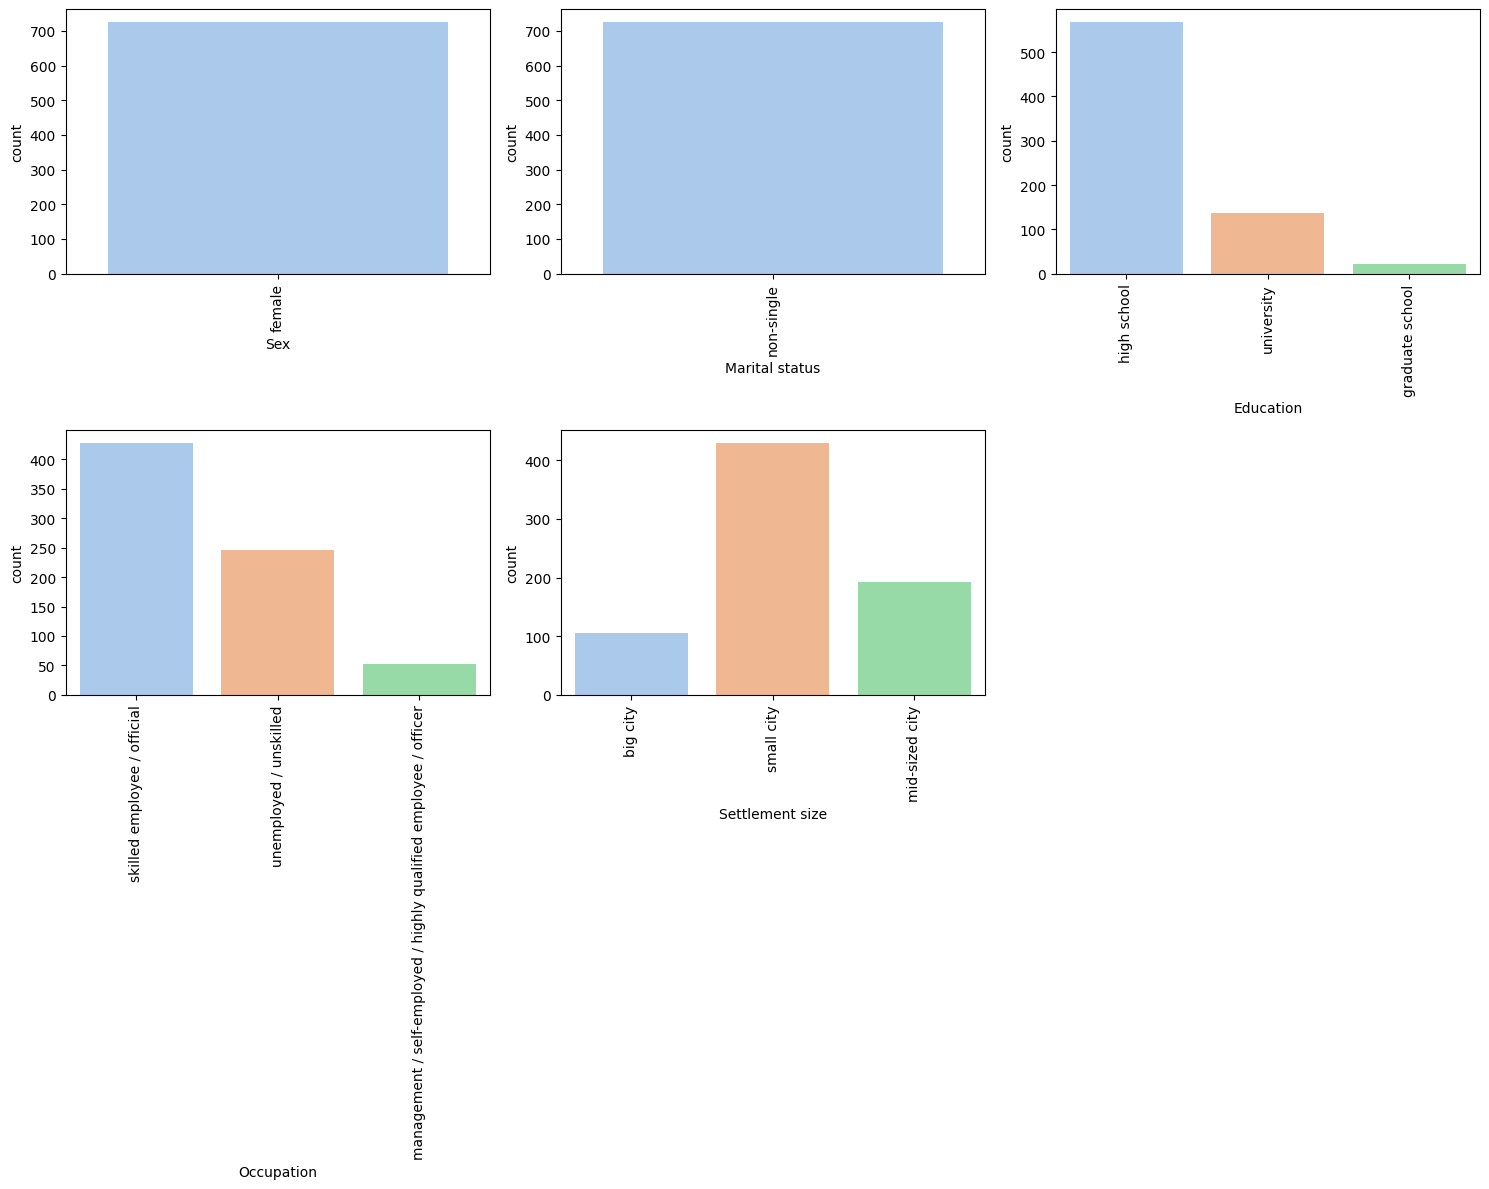

In [41]:
categories = data[data['dbscan_labels'] == 1][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

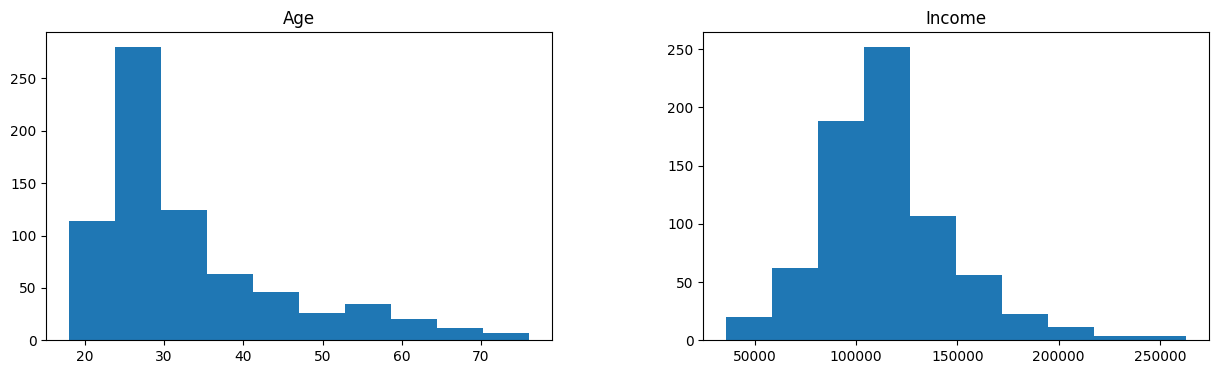

In [42]:
data[data['dbscan_labels'] == 1][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 1:
* Женщины
* Не одинокие
* Закончили старшую школу, некоторые университет и аспирантуру (малая часть)
* Квалифицированные сотрудники, безработные, должностные лица (мало)
* Из маленьких, средних городов, немного из больших  
* 20-40 лет
* Доход ниже среднего

Cluster 2

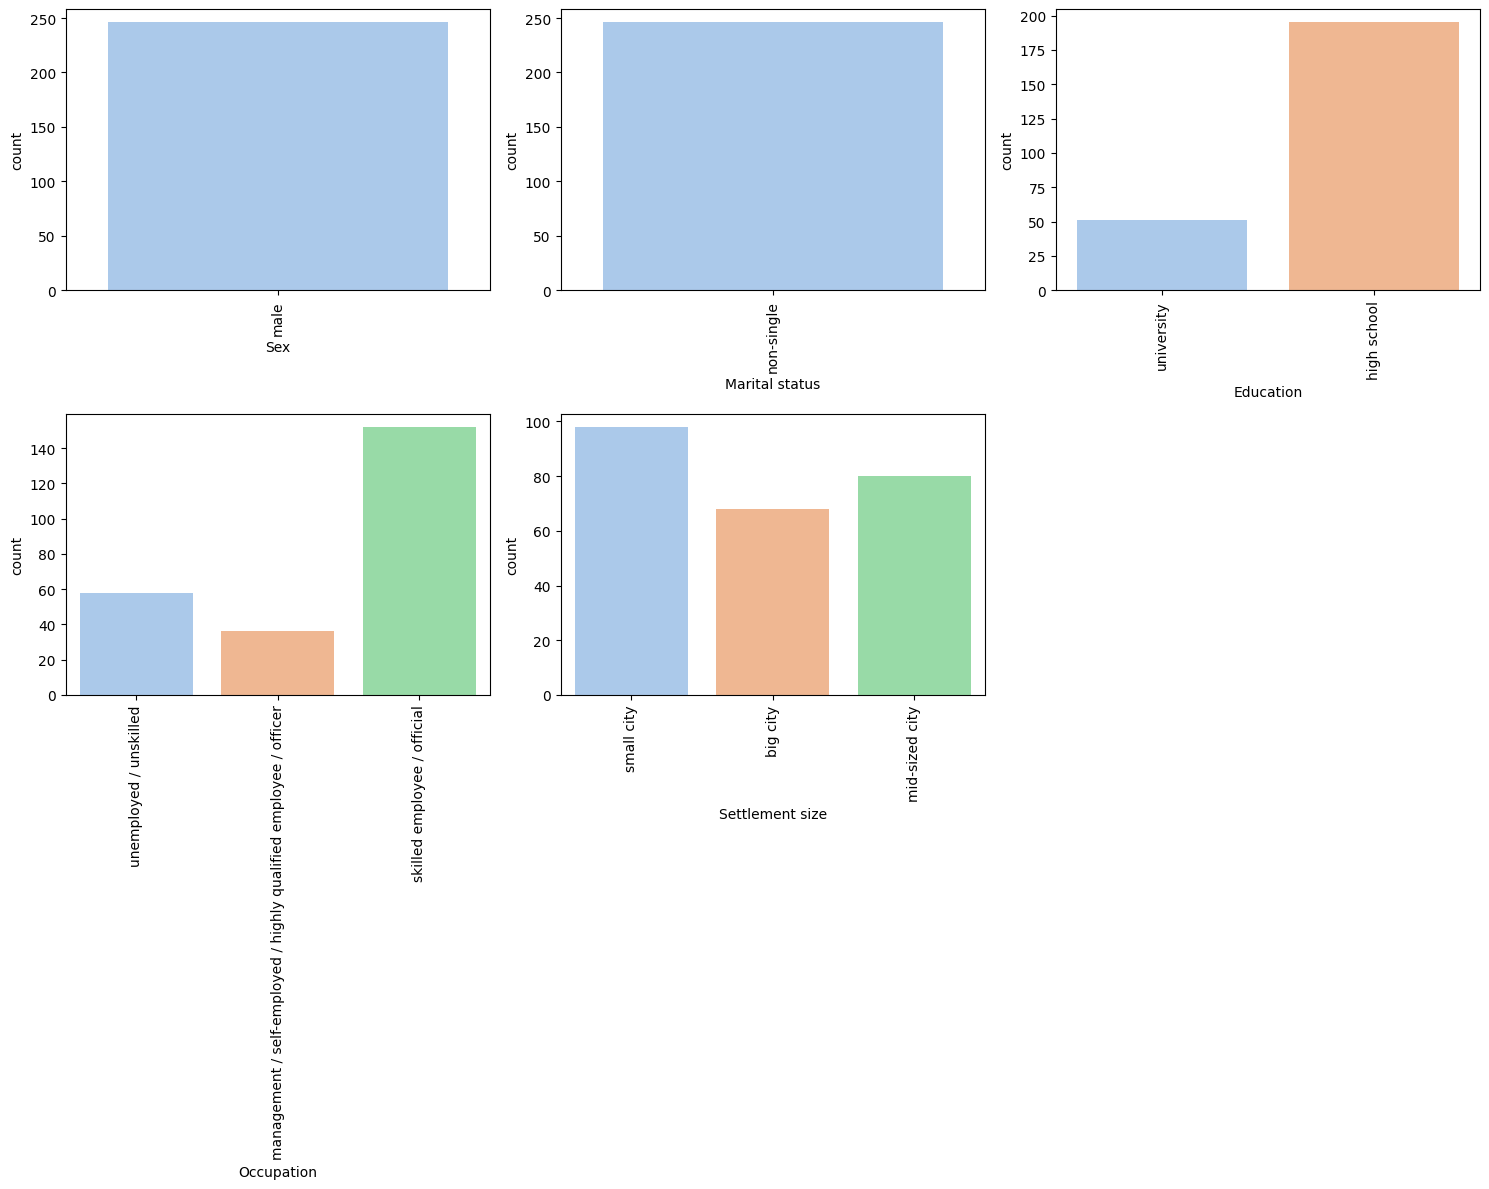

In [43]:
categories = data[data['dbscan_labels'] == 2][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

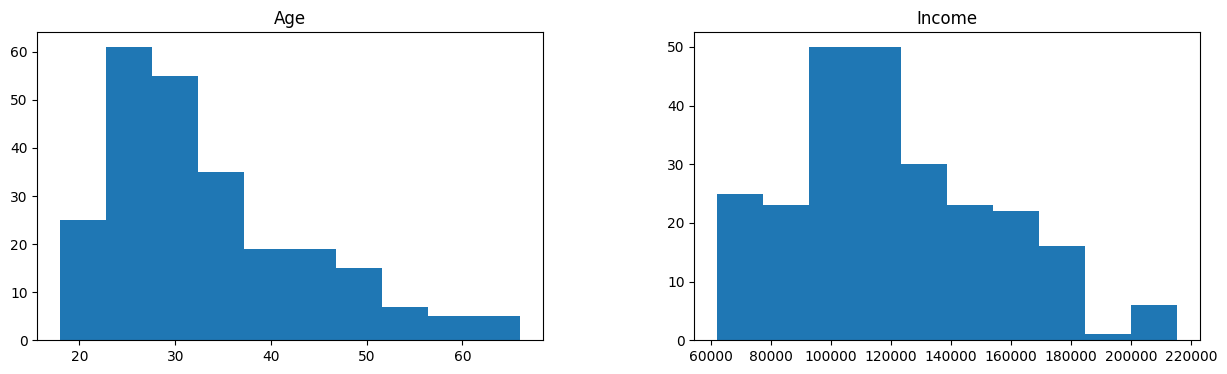

In [44]:
data[data['dbscan_labels'] == 2][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 2:
* Мужчины  
* Не одинокие
* Закончили старшую школу, некоторые университет
* Квалифицированные сотрудники, безработные и должностные лица (малая часть)
* Из маленьких, средних и больших городов
* 20-45 лет
* Средний, ниже среднего доход

Cluster 3

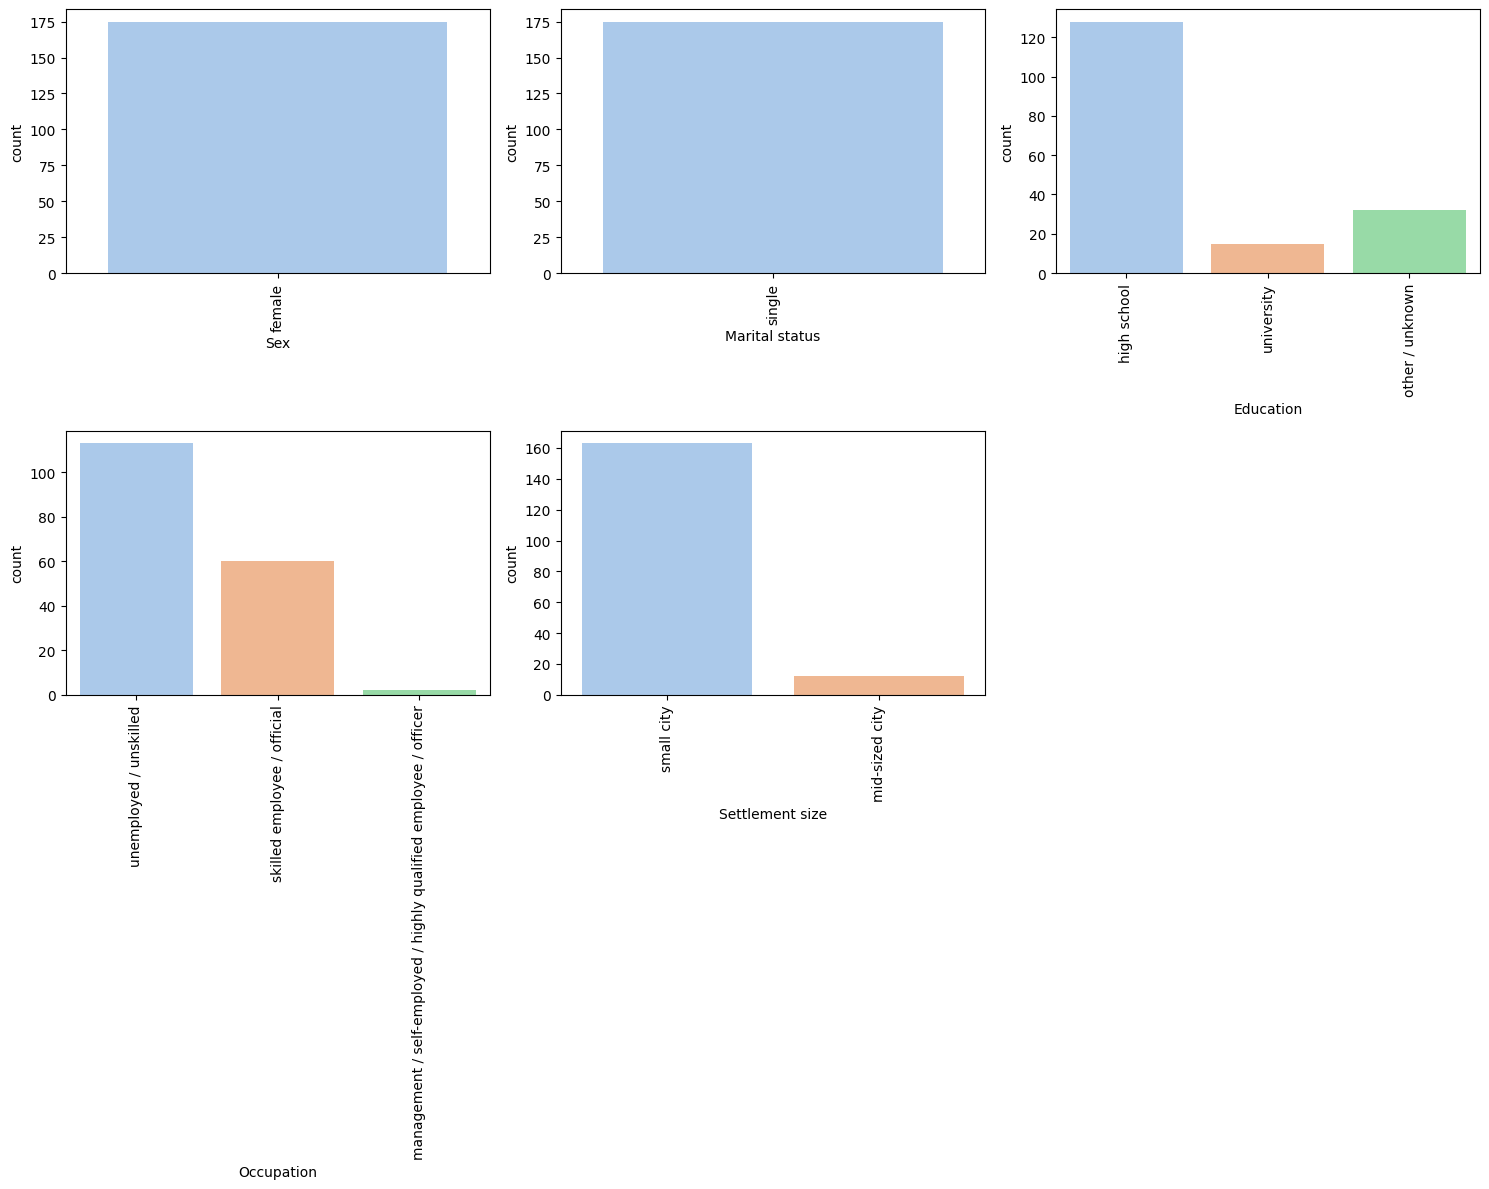

In [45]:
categories = data[data['dbscan_labels'] == 3][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

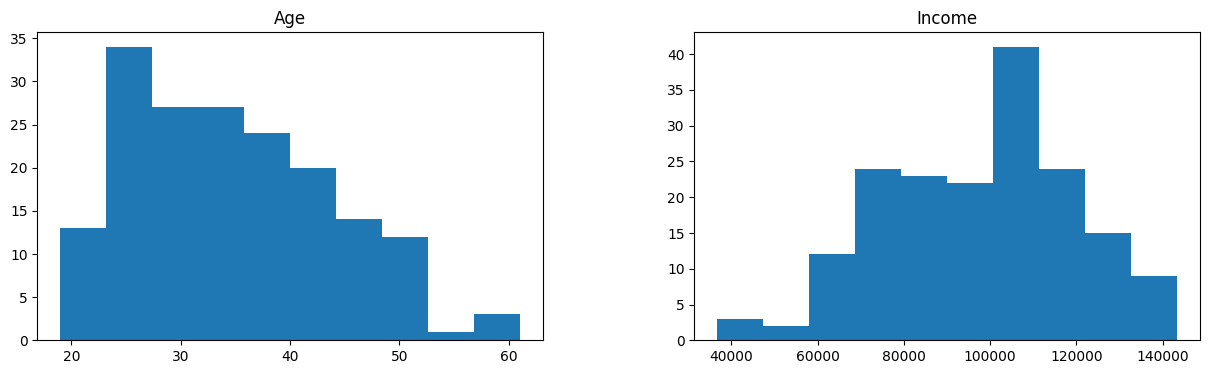

In [46]:
data[data['dbscan_labels'] == 3][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

Характеристика кластера 3:
* Женщины
* Одинокие
* Закончили школу, немногие университет
* Безработные, квалифицированные сотрудники
* Из маленьких городов
* 20-50 лет
* Доход ниже среднего

Cluster -1 (выбросы)

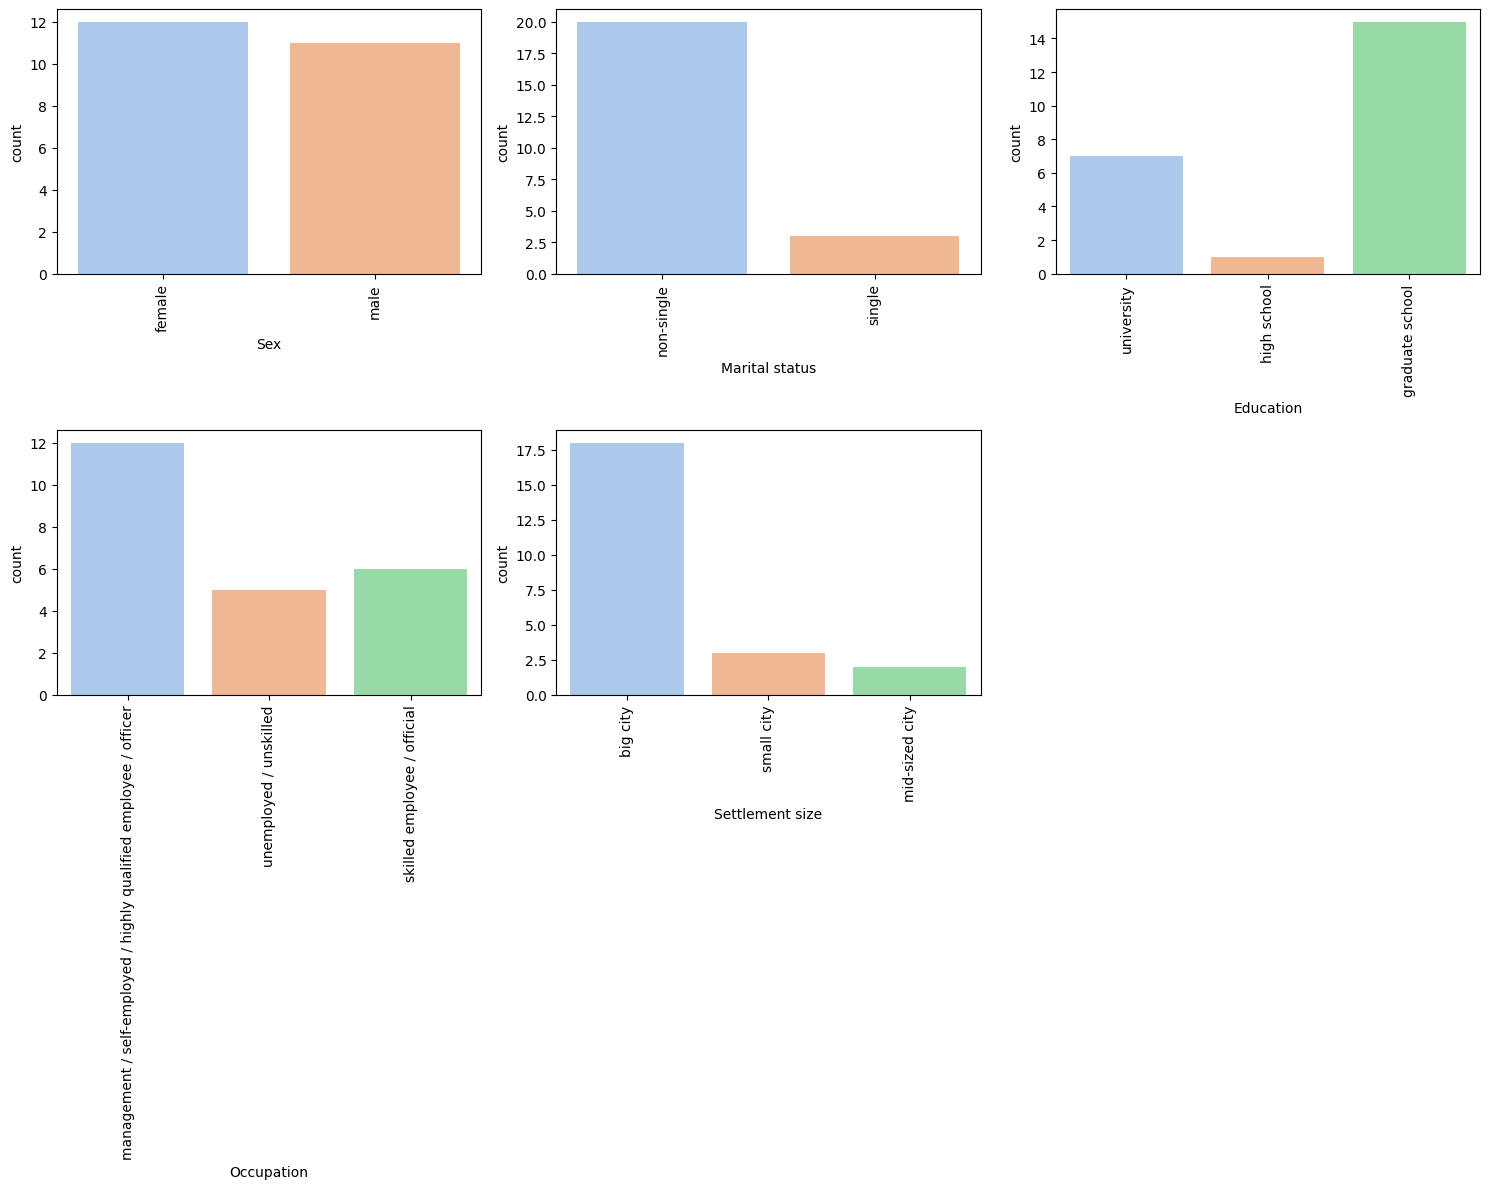

In [47]:
categories = data[data['dbscan_labels'] == -1][['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']]

plt.figure(figsize = (15, 12))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], hue=categories[col], palette='pastel', legend=False)
  plt.tight_layout()
  plt.xticks(rotation=90)
plt.show()

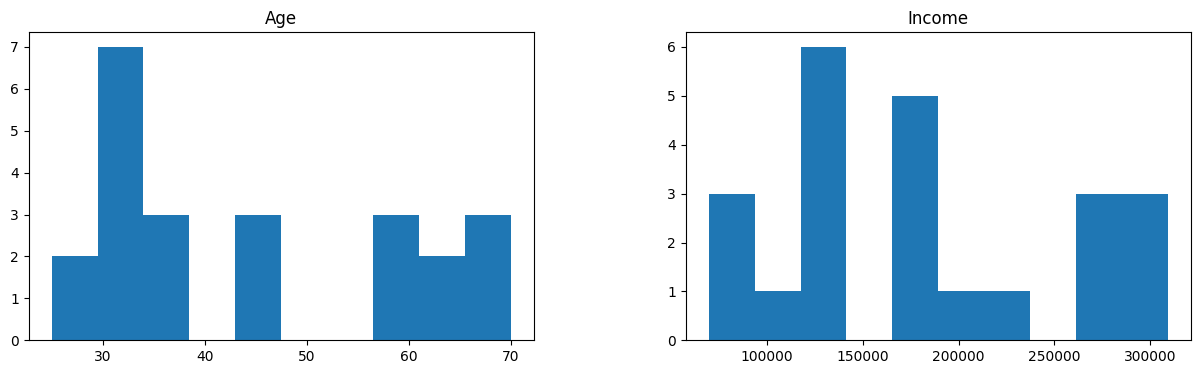

In [48]:
data[data['dbscan_labels'] == -1][['Age', 'Income']].hist(figsize=(15, 4), grid=False)
plt.show()

# Scores

In [49]:
print('K-means Silhouette Score =', silhouette_score(X, kmeans_labels))
print('Agglomerative clustering Silhouette Score =', silhouette_score(X, aggl_labels))
print('DBSCAN Silhouette Score =', silhouette_score(X, dbscan_labels))

K-means Silhouette Score = 0.26879180394522123
Agglomerative clustering Silhouette Score = 0.25080894270462684
DBSCAN Silhouette Score = 0.17760230988900047


По оценке коэффициента силуэта лучший результат получился у модели K-means.

Только модель DBSCAN для всех своих 4 кластеров явно выделила группы: одинокие мужчины, одинокие женщины, мужчины с семьями, женщины с семьями. Но она также посчитала некоторые данные, которые не попали в диапазон, за выбросы.

Остальные модели столь явно не смогли выделить группы.